# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1175]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [1176]:
data = pd.read_csv("C:\\Users\\Rucha\\Downloads\\used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

In [1177]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


* The dataset contains technical/product information about different manufacturing brands
* Many brands seem to have a single operating system only, which is Android


### Checking the shape of the dataset

In [1178]:
data.shape

(3454, 15)

* The dataset contains information (15 attributes) about 3454 records.

### Checking the data types of the columns for the dataset

In [1179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

* There are 11 numeric (*float* and *int* type) and 4 string (*object* type) columns in the data
* The target variable is the normalized_used_price, which is of *float* type
* There are missing values in 6 features

### Statistical summary of the dataset

In [1180]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


* Android is the most common operating system used in the brands
* We can see that the min normalized_new_price ranges from 2.9 euros to a max of 7.84 euros
* The dataset covers information about 34 unique brands.
* The release_year of the brands varies from 2013 to 2020
* The weight of the used phones and tablets lies in the range from 69gms to 855gms
* Most of the phones and tablets use the 4g network

### Checking for duplicate values

In [1181]:
data.duplicated().sum()

0

* There are no duplicate values in the data

### Checking for missing values

In [1182]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* There are missing values in many columns.

In [1183]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**The below functions need to be defined to carry out the EDA.**

In [1184]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [1185]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

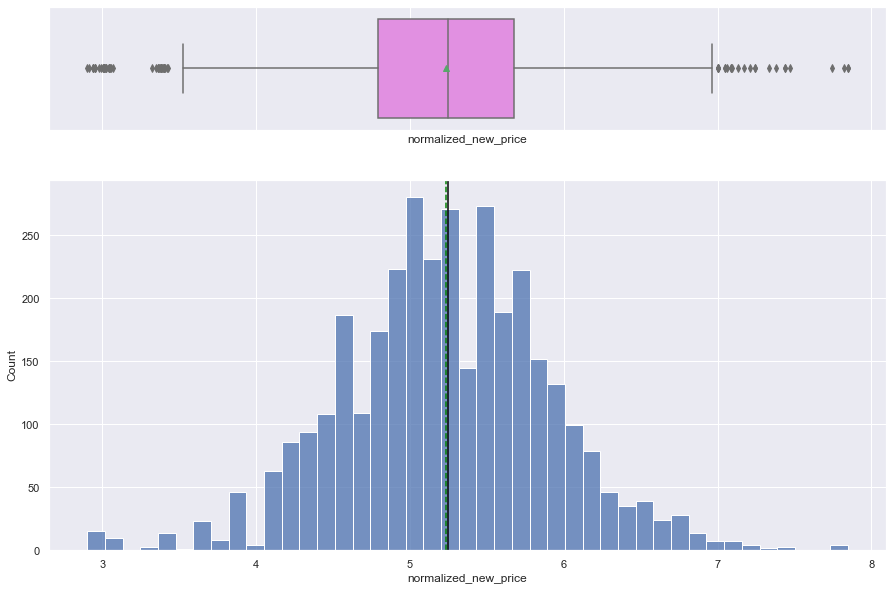

In [1186]:
histogram_boxplot(df, "normalized_new_price" )

* Some of the normalized_new_prices are extremely low while some of them are extremely high which are indicated by the outliers present at both ends
* The new price is approximately 5.23 euros on an average

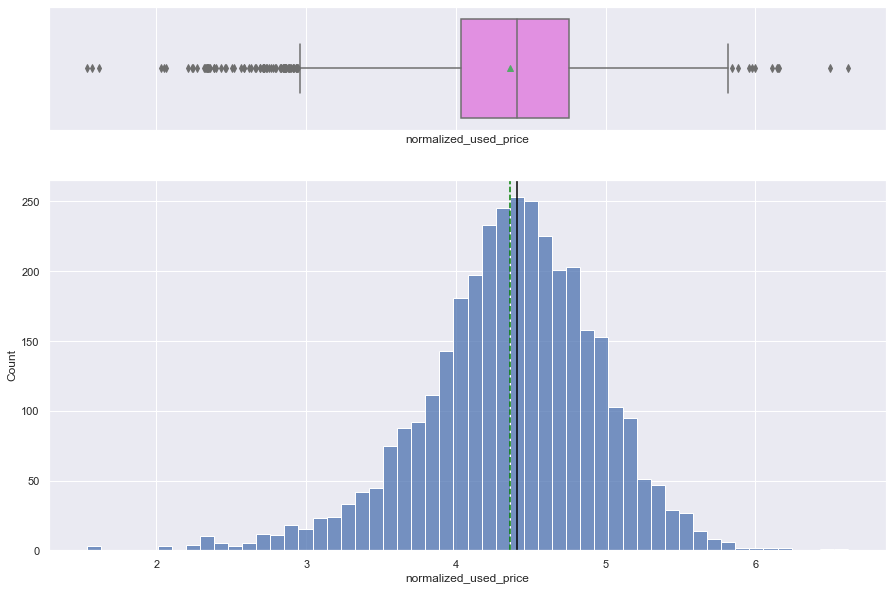

In [1187]:
histogram_boxplot(df, "normalized_used_price" )

* The distribution of `normalized_used_price` has a bell shaped curve. Some of the used_prices are extremely low while some of them are extremely high which are indicated by the outliers present at both ends
* The used price is approximately 4.36 euros on an average

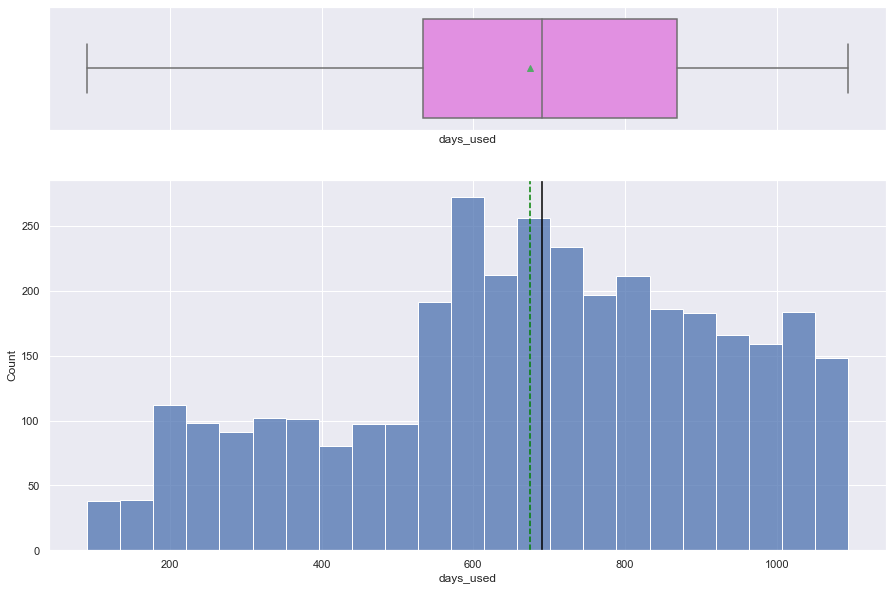

In [1188]:
histogram_boxplot(df,"days_used")

* 50% of the phones/tablets are used for less than 700 days

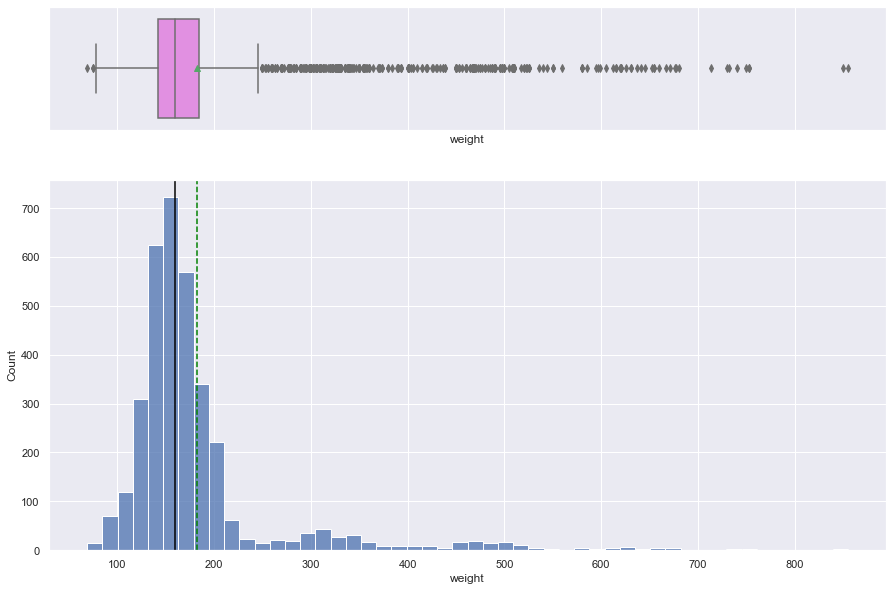

In [1189]:
histogram_boxplot(df, "weight", bins=50 )

* The distribution of weights looks heavily right skewed indicating that some of the phone/tablets are bulky.

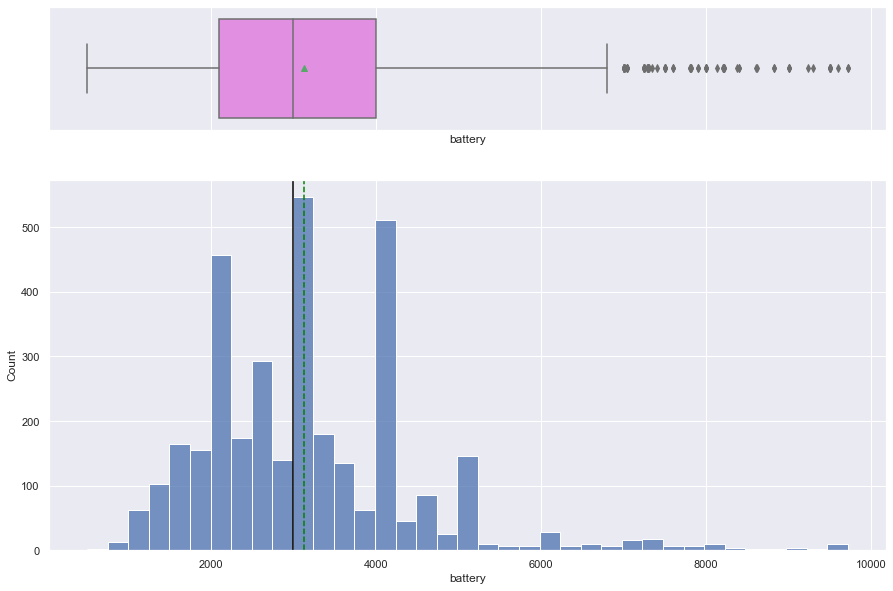

In [1190]:
histogram_boxplot(df, "battery")

* Some of the electronics items need high power battery which is indicated by heavily right skewed distribution.

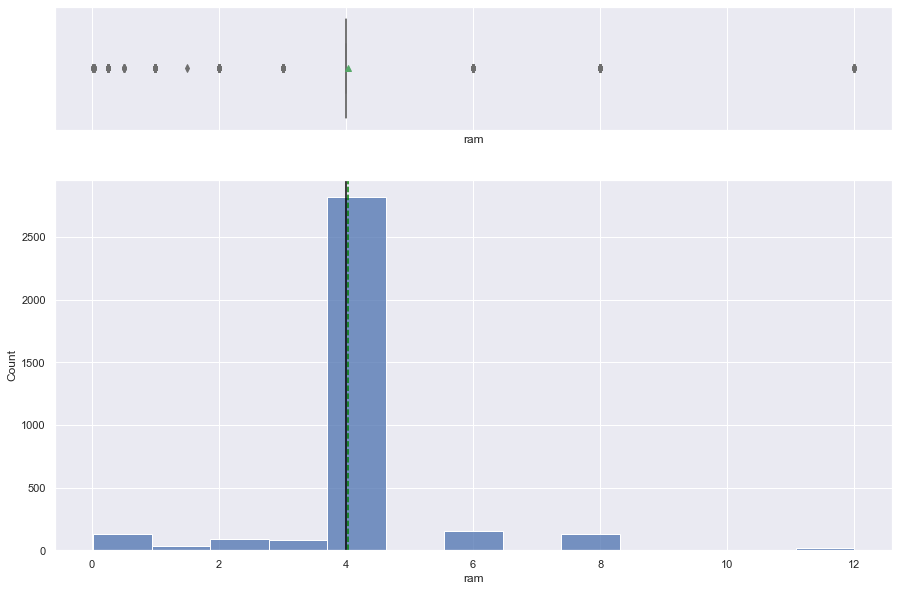

In [1191]:
histogram_boxplot(df, "ram")

* The available `ram` is nearly 4 GB on an average.

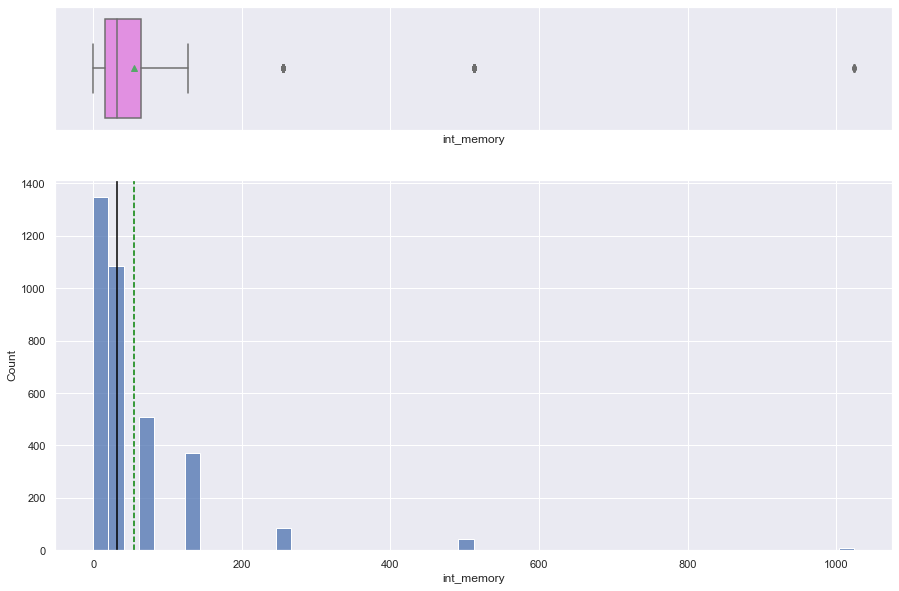

In [1192]:
histogram_boxplot(df, "int_memory", bins=50)

* On an average, the available `ROM` is 54 GB

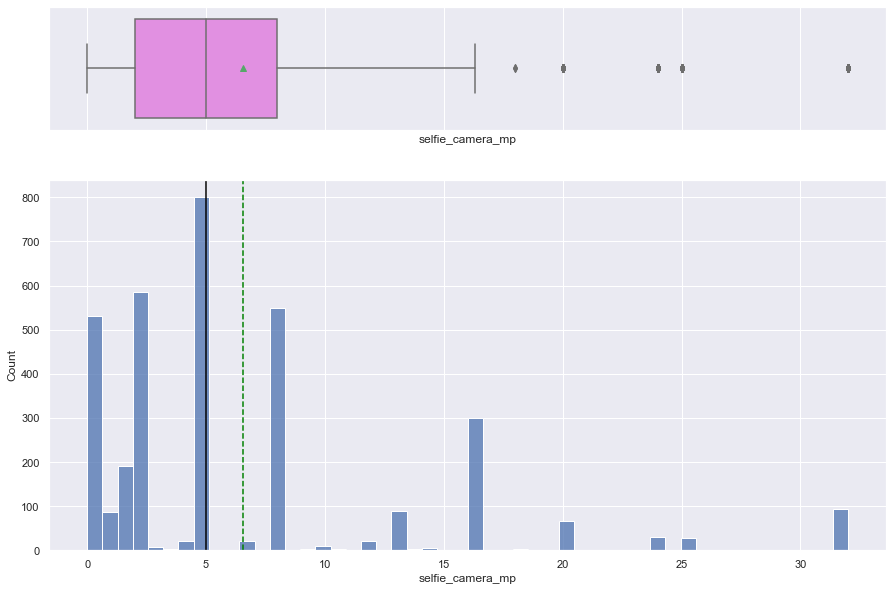

In [1193]:
histogram_boxplot(df, "selfie_camera_mp", bins=50)

* Some of the selfie camera have extremely high megapixels.
* 50% of the devices have selfie cameras with less than `5` megapixels.

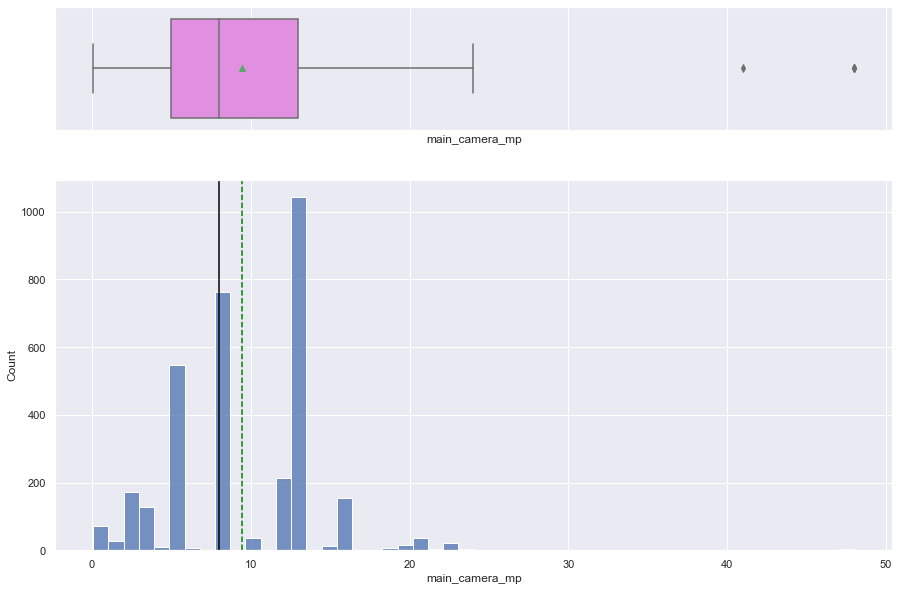

In [1194]:
histogram_boxplot(df, "main_camera_mp", bins=50)

* Some of the main camera have extremely high megapixels.
* 50% of the devices have selfie cameras with less than `8` megapixels.

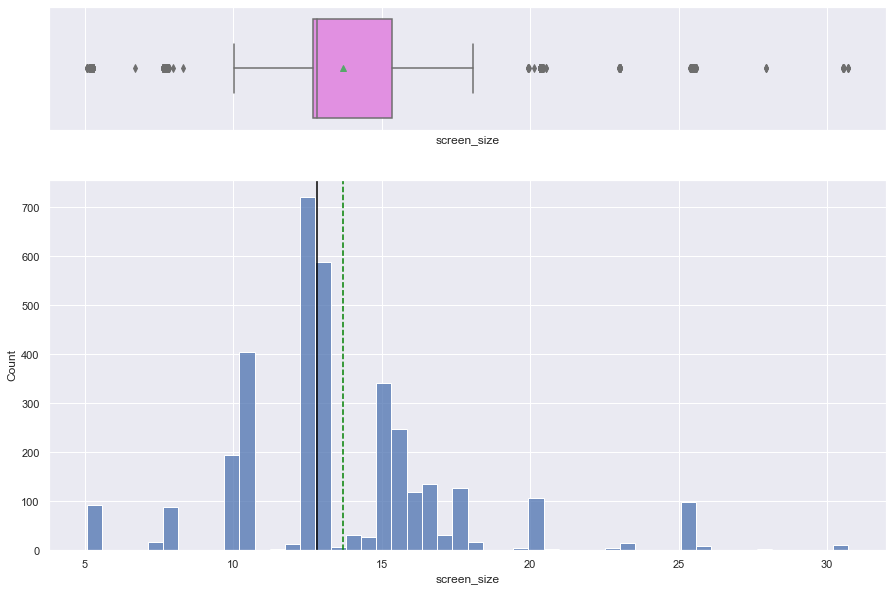

In [1195]:
histogram_boxplot(df, "screen_size", bins=50)

<Figure size 1440x1080 with 0 Axes>

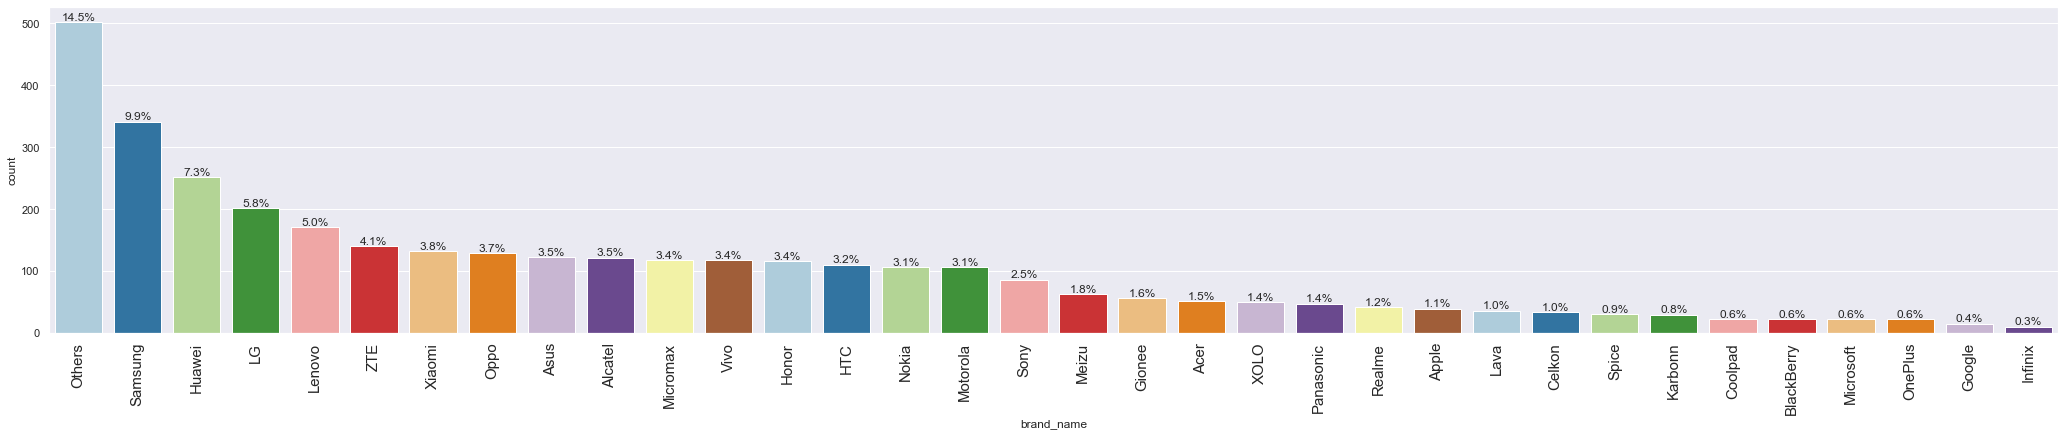

In [1196]:
plt.figure(figsize=(20, 15))
labeled_barplot(df, "brand_name", perc=True)

In [1197]:
df["brand_name"].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

* `Samsung` and `Huawei` are among the top 3 most popular brands
* Brands apart from well know brands (others) are also popular in the market

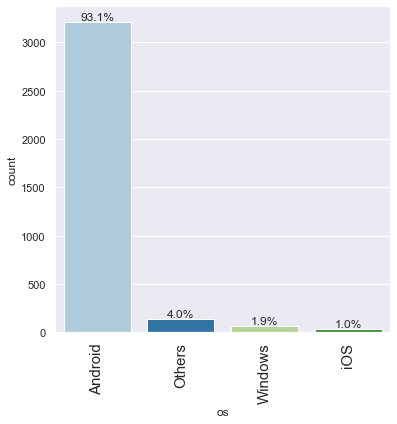

In [1198]:
labeled_barplot(df, "os", perc=True)

* `93.1%` of the used market device is dominated by the `Android` devices

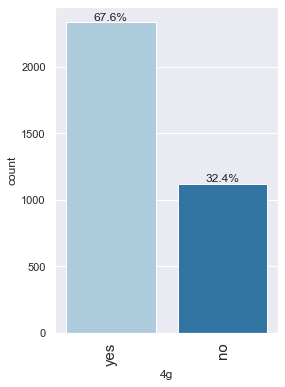

In [1199]:
labeled_barplot(df, "4g", perc=True)

* For nearly `68%` of the phones/tablets 4g network is available

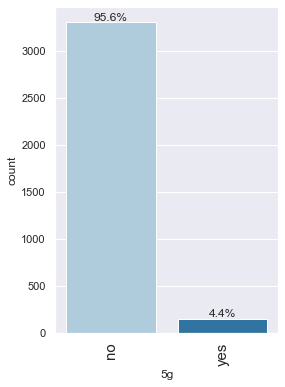

In [1200]:
labeled_barplot(df, "5g", perc=True)

* 5g network is not available for almost `96%` of the mobile devices

Notes
* Univariate analysis has been reperformed after Data Preprocessing
* Bivariate analysis is performed after data preprocessing as it might affect the insights

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [1201]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [1202]:
# we first create a copy of the data to avoid changes to it
df1 = df.copy()

In [1203]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["brand_name", "os"])["main_camera_mp"].transform("median")
)

df1["selfie_camera_mp"] = df1["selfie_camera_mp"].fillna(
    value=df1.groupby(["brand_name", "os"])["selfie_camera_mp"].transform("median")
)

df1["int_memory"] = df1["int_memory"].fillna(
    value=df1.groupby(["brand_name", "os"])["int_memory"].transform("median")
)

df1["ram"] = df1["ram"].fillna(
    value=df1.groupby(["brand_name", "os"])["ram"].transform("median")
)

df1["battery"] = df1["battery"].fillna(
    value=df1.groupby(["brand_name", "os"])["battery"].transform("median")
)

df1["weight"] = df1["weight"].fillna(
    value=df1.groupby(["brand_name", "os"])["weight"].transform("median")
)

In [1204]:
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [1205]:
df1['main_camera_mp'].unique()

array([13.  ,  8.  ,  5.  , 10.5 ,  3.15,   nan,  2.  , 16.  ,  0.3 ,
       12.  , 14.5 , 48.  ,  3.  , 21.  ,  1.3 , 13.1 , 24.  ,  0.08,
       20.7 , 23.  ,  1.  , 18.  , 12.2 , 12.3 , 20.  , 20.2 ,  4.  ,
       12.5 , 10.  ,  6.5 ,  6.7 , 41.  , 20.1 , 12.6 , 16.3 , 22.6 ,
       19.  , 21.5 , 21.2 ,  8.1 ,  1.2 , 22.5 ])

In [1206]:
df1.loc[df1["main_camera_mp"].isnull()==True ]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,4.405133,4.605370
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.495913,4.702115
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,4.370713,4.487287
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,4.417997,4.605970
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,4.423289,4.866072


In [1207]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(
    value=df1.groupby(["os"])["main_camera_mp"].transform("median"))

In [1208]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### Feature Engineering

* We will drop the original column `release_year` as the year value is not numerical in nature

In [1209]:
df1.drop(["release_year"], axis=1, inplace=True)

df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837


### Outlier Detection

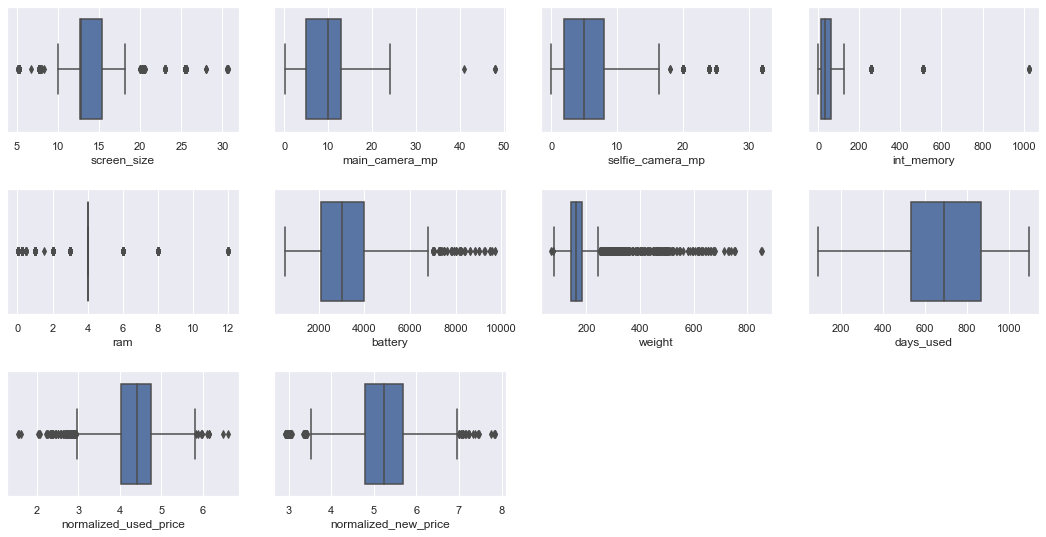

In [1210]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

* There are quite a few outliers in the data
* However, we will not treat them as they are electronic feature realistic values/proper values
* In situations where the outlier values look unrealistic, they can be treated with the IQR methods. However, this is not the case for the current business case study

### Data Preparation for Modeling

- We want to predict the price of a `used phone/tablet` 
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [1211]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  
0              4.715100  
1              5.519018  
2              5.884631  
3              5.630961  
4              4.947837  
0    4.307572
1    5.162097
2    5.111084
3    5.1

In [1212]:
# let's add the intercept to data
X = sm.add_constant(X)

In [1213]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,1.0,15.34,13.0,8.0,64.0,6.0,5000.0,190.0,232,6.483872,...,0,0,0,0,0,0,0,0,1,0
3450,1.0,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,541,6.251538,...,0,0,0,0,0,0,0,0,1,0
3451,1.0,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,201,4.528829,...,0,0,0,0,0,0,0,0,1,0
3452,1.0,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,149,4.624188,...,0,0,0,0,0,0,0,0,1,0


In [1214]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [1215]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

* It is a good idea to explore the data once again after manipulating it.
* Detailed EDA has been performed on the treated data

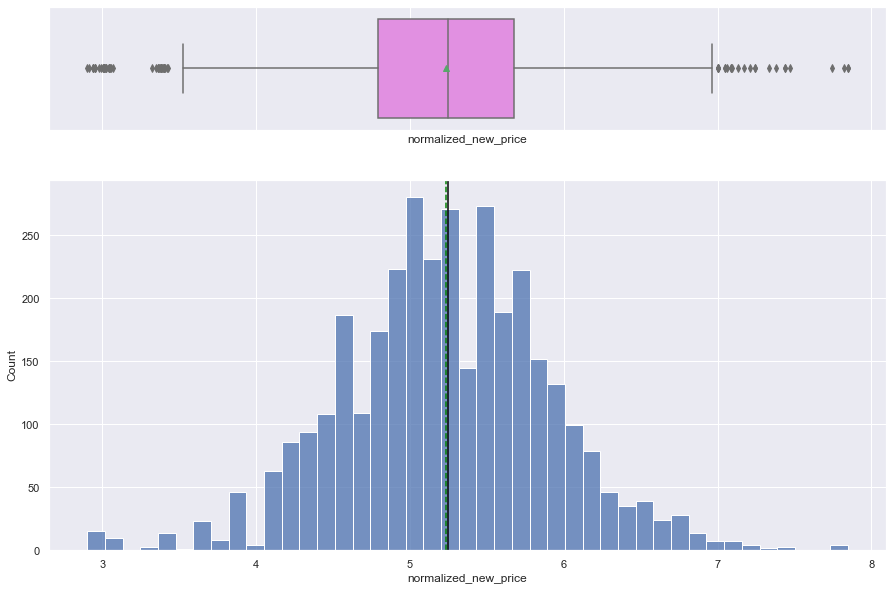

In [1216]:
histogram_boxplot(df1, "normalized_new_price" )

* Some of the normalized_new_prices are extremely low while some of them are extremely high which are indicated by the outliers present at both ends
* The new price is approximately 5.23 euros on an average

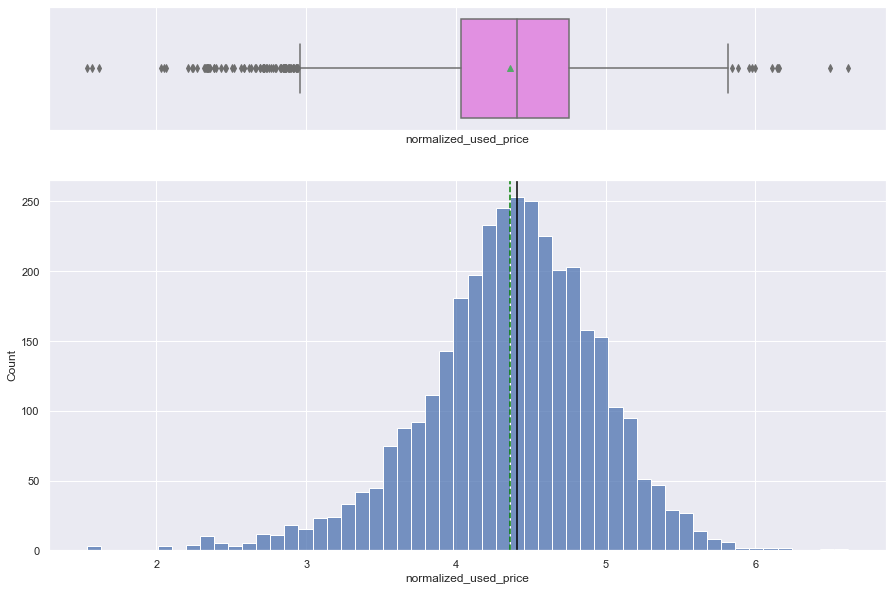

In [1217]:
histogram_boxplot(df1, "normalized_used_price" )

* `Normalized_used_price`distribution follows a bell shaped curve
* Some of the normalized_used_prices are extremely low while some of them are extremely high which are indicated by the outliers present at both ends
* The used price is approximately 4.36 euros on an average

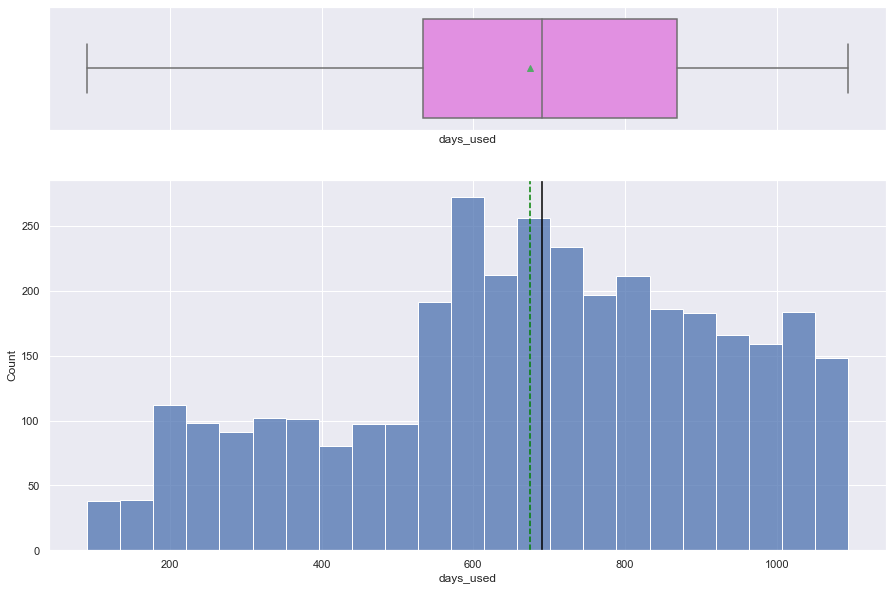

In [1218]:
histogram_boxplot(df1,"days_used")

* 50% of the phones/tablets are used for less than 700 days

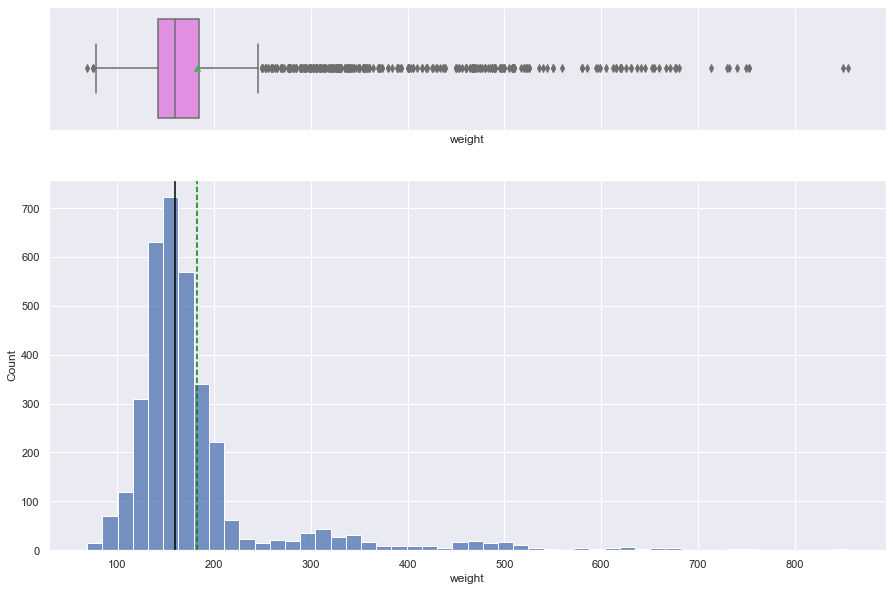

In [1219]:
histogram_boxplot(df1, "weight", bins=50 )

* The distribution of weights looks heavily right skewed indicating that some of the phone/tablets are bulky.

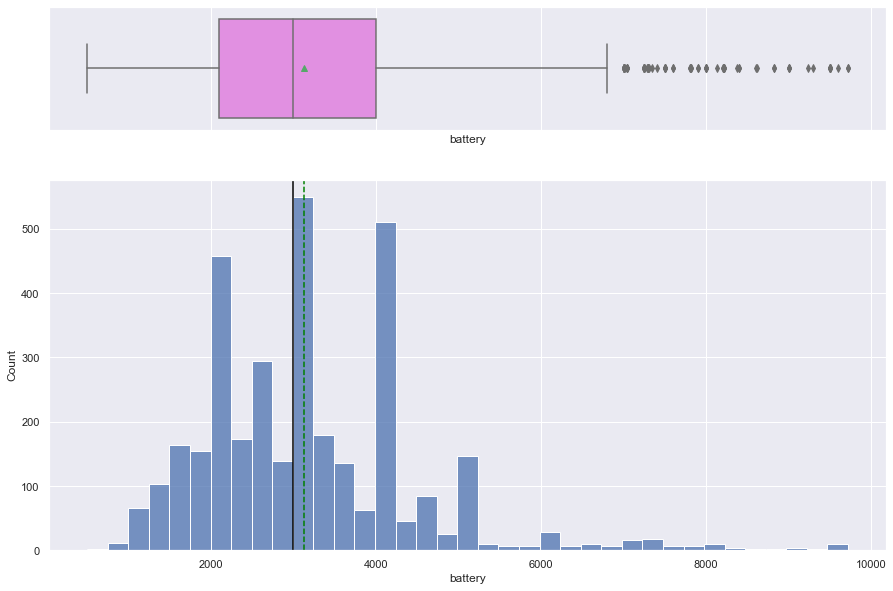

In [1220]:
histogram_boxplot(df1, "battery")

* Few of the electronics items need high power battery which is indicated by heavily right skewed distribution.

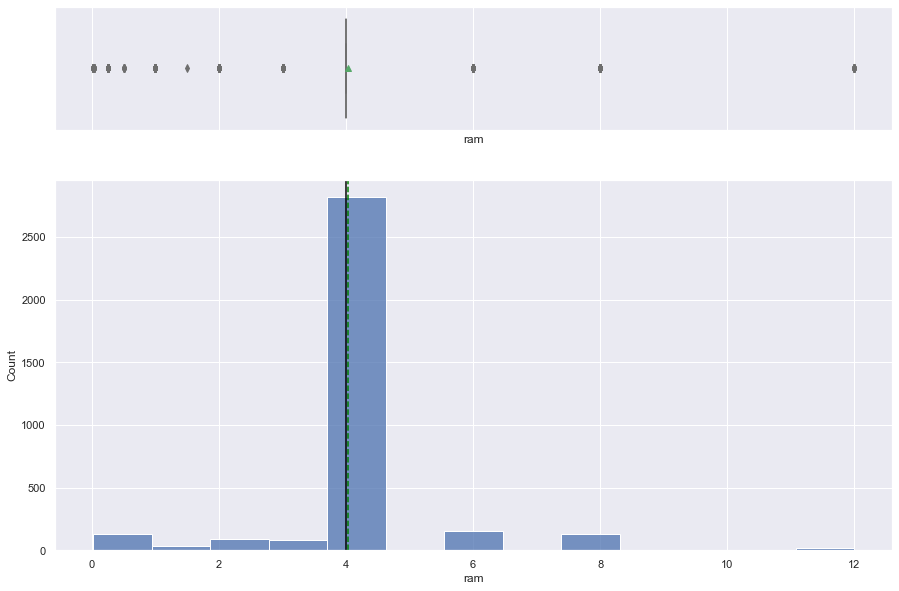

In [1221]:
histogram_boxplot(df1, "ram")

* Significantly high amount of devices have 4GB ram 

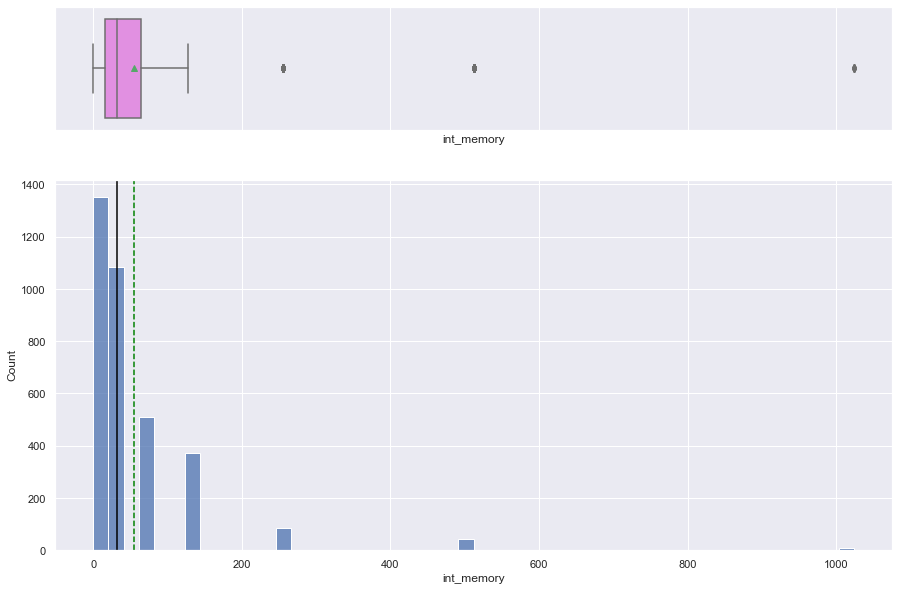

In [1222]:
histogram_boxplot(df1, "int_memory", bins=50)

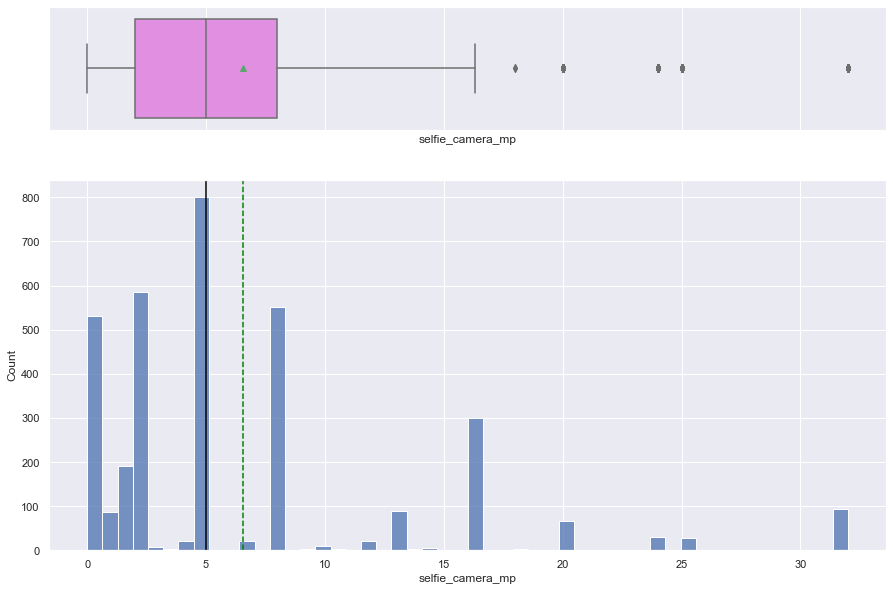

In [1223]:
histogram_boxplot(df1, "selfie_camera_mp", bins=50)

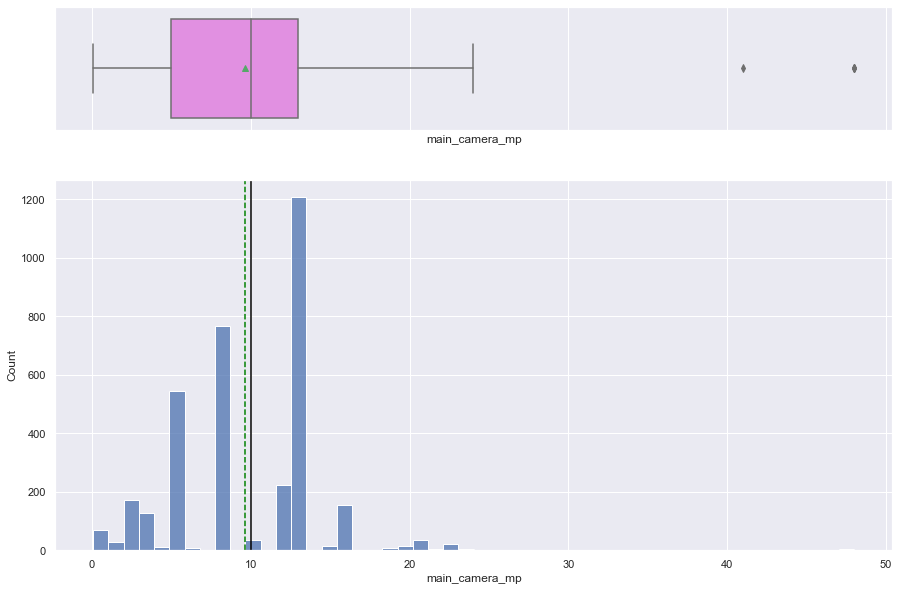

In [1224]:
histogram_boxplot(df1, "main_camera_mp", bins=50)

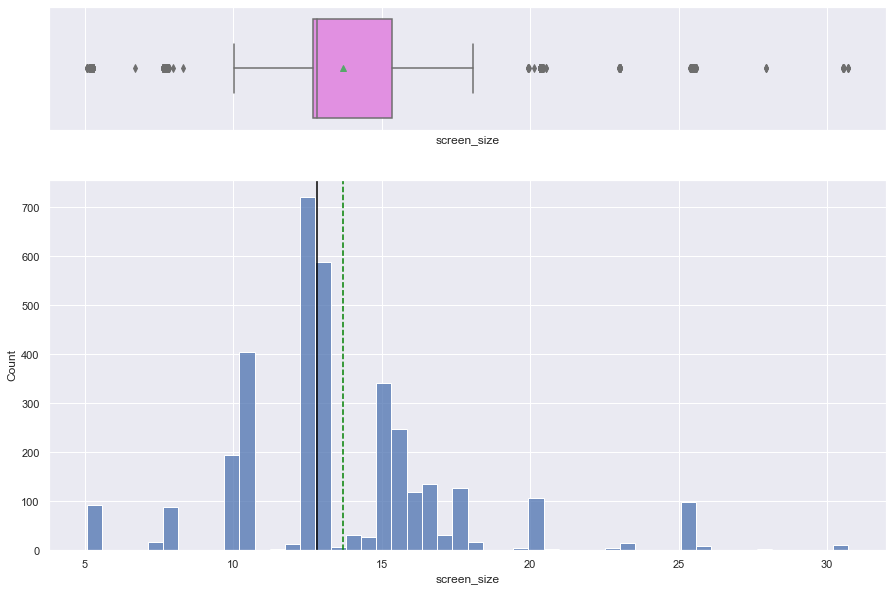

In [1225]:
histogram_boxplot(df1, "screen_size", bins=50)

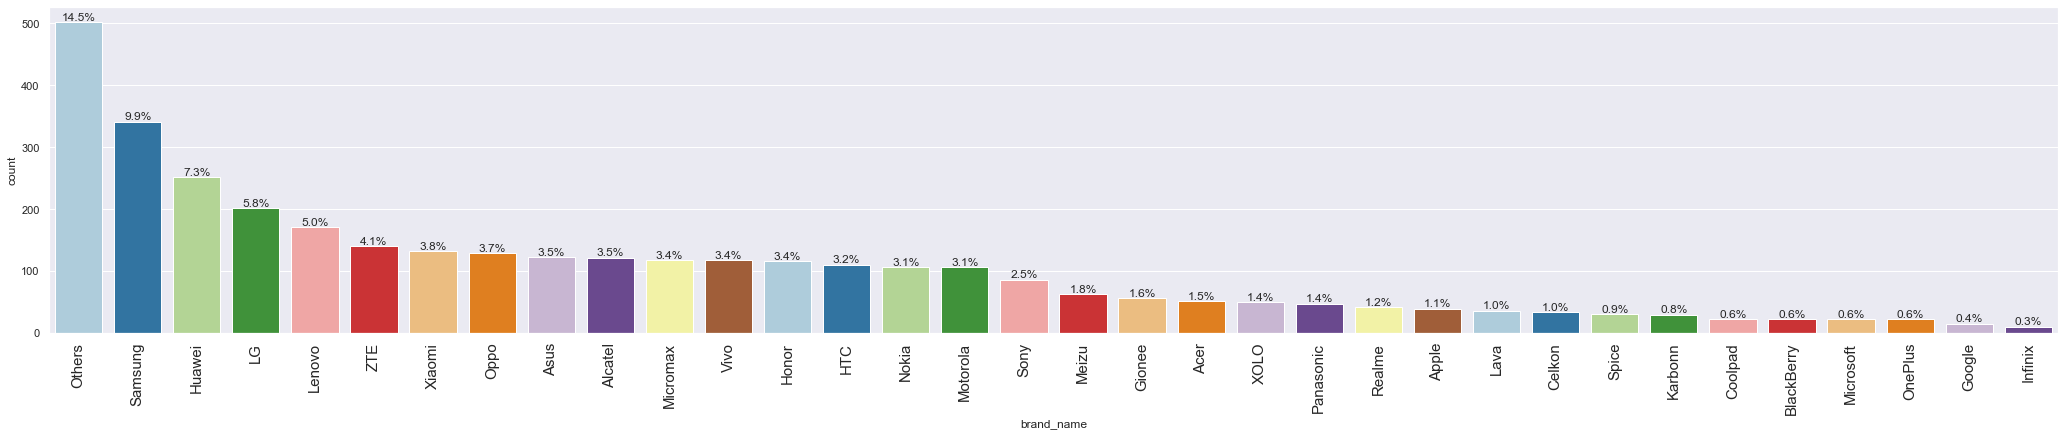

In [1226]:
labeled_barplot(df1, "brand_name", perc=True)

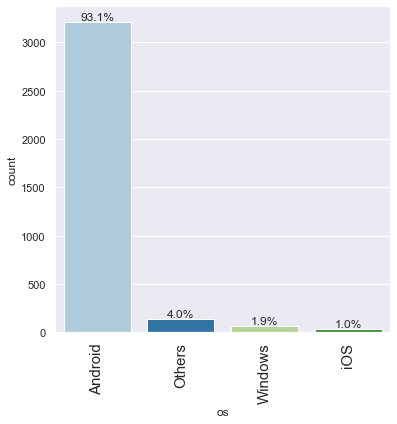

In [1227]:
labeled_barplot(df1, "os", perc=True)

* `93.1%` of the used device market is dominated by the Android devices

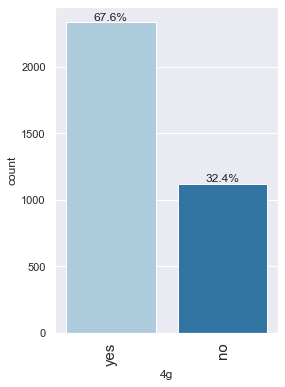

In [1228]:
labeled_barplot(df1, "4g", perc=True)

* `68%` of the devices are available with 4g network

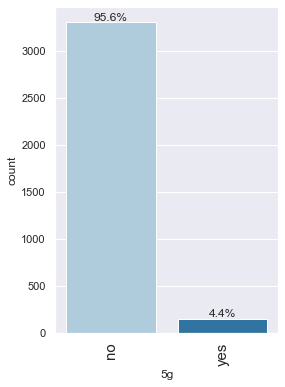

In [1229]:
labeled_barplot(df1, "5g", perc=True)

* 96% of the phones/tablets are not available with the 5g network

In [1230]:
# creating a list of numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()
num_cols

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

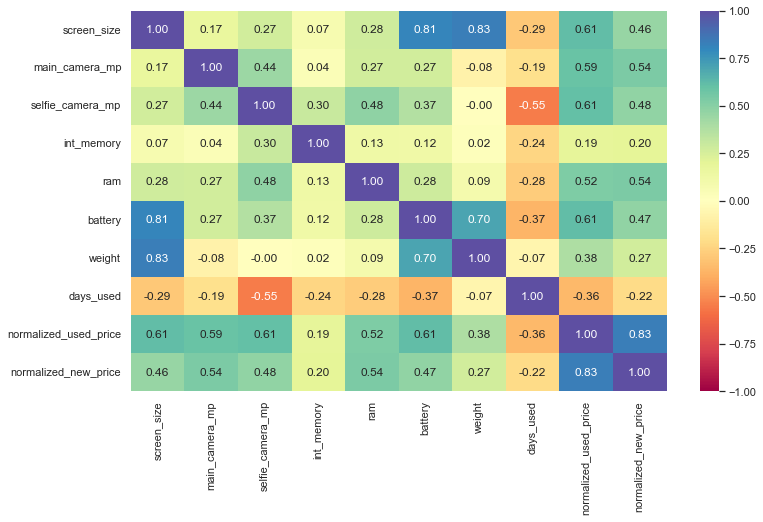

In [1231]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* `normalized_new_price` is highly correlated with the used price
* Variables like `screen_size`, `selfie_camera_mp` are also strongly correlated with `normalized_used_price`

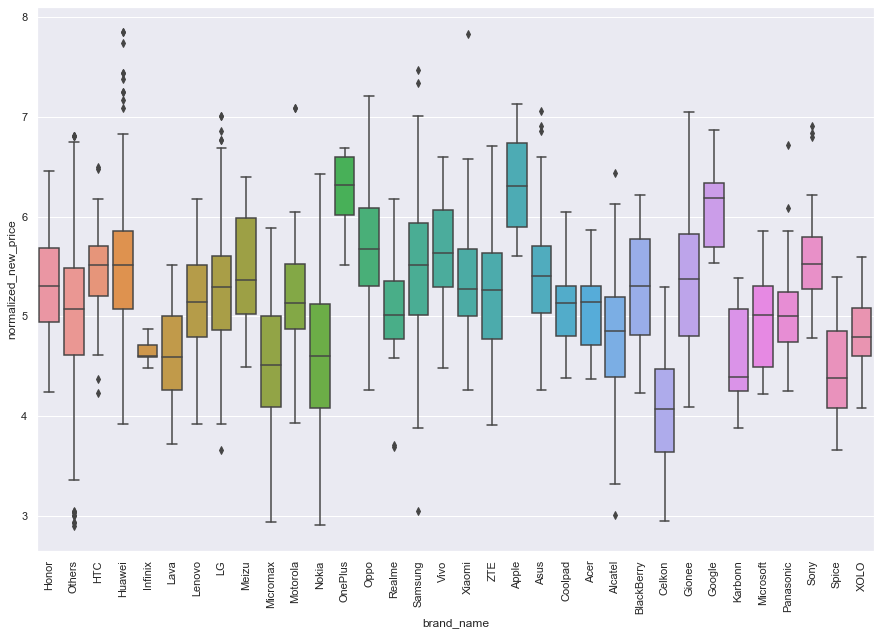

In [1232]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

* `Apple` brand has  highest `normalized_new_price` in general for all models
* Overall, the `normalized_new_prices` are lower for the `Celkon` brand

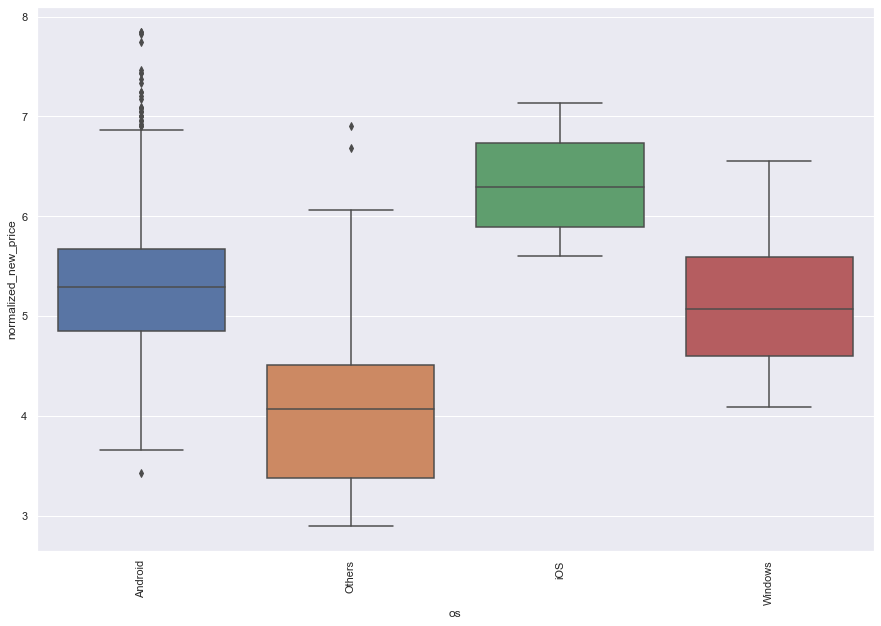

In [1233]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df1, x="os", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

* `ios` operating system is pricey as compared to others os
* The price range of `Android` and `Windows` os is comparable

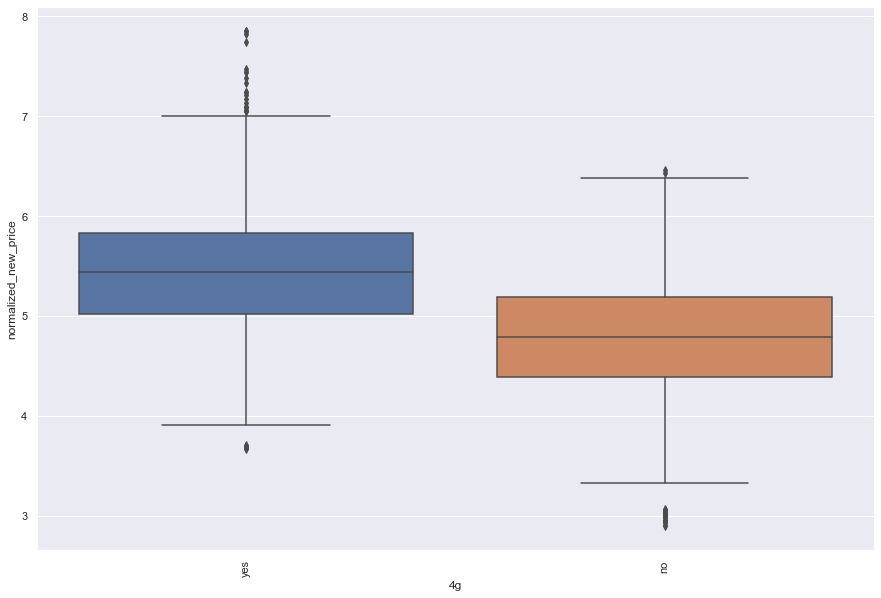

In [1234]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="4g", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

* `New phones/tablets` with 4g network availability are expensive in general as compared to devices without 4g 

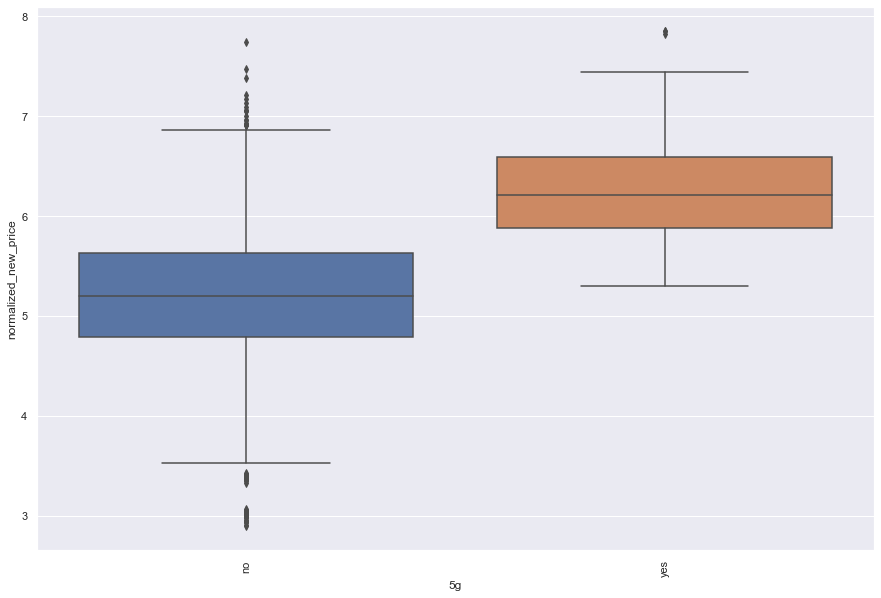

In [1235]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="5g", y="normalized_new_price")
plt.xticks(rotation=90)
plt.show()

* `New phones/tablets` with 5g network availability are expensive in general as compared to devices without 5g availability

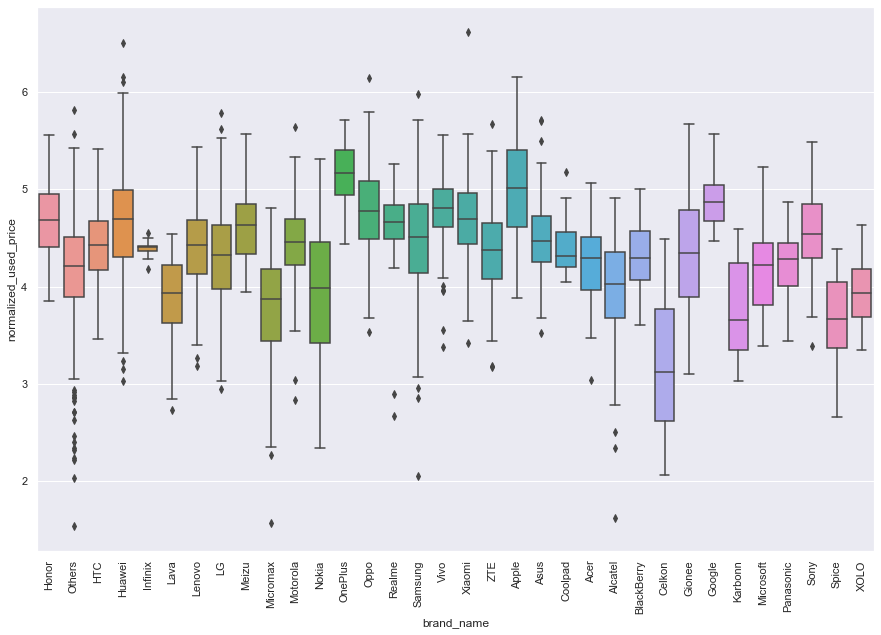

In [1236]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

* `Apple` brand has  highest `normalized_used_price` in general for all models
* Overall, the `normalized_used_prices` are lower for the `Celkon` brand
* This trend is similar to the trend followed by normalized prices for new phones/tablets

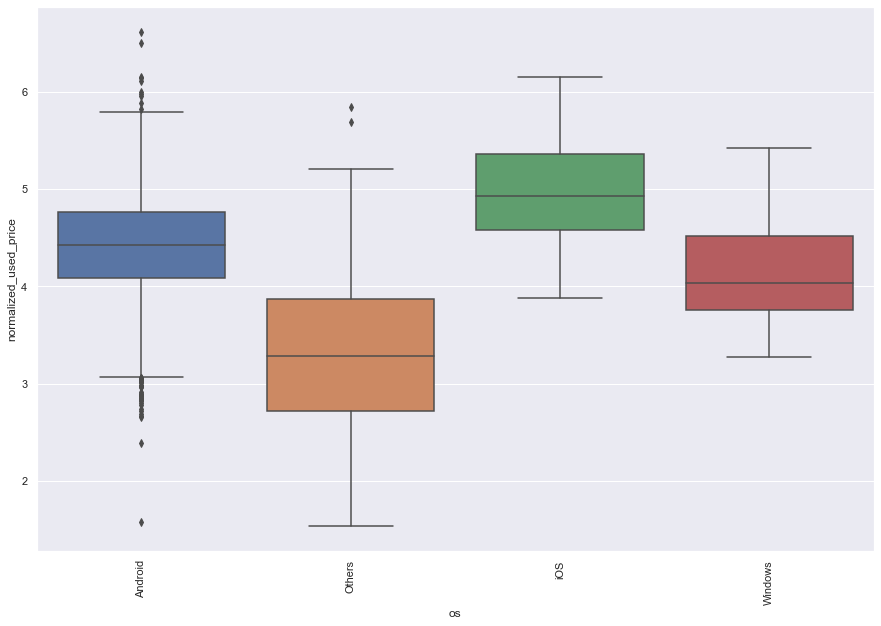

In [1237]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="os", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

* `ios` operating system is pricey as compared to others os
* The price range of `Android` and `Windows` os is comparable
* This trend is similar to the trend followed by normalized prices for new phones/tablets

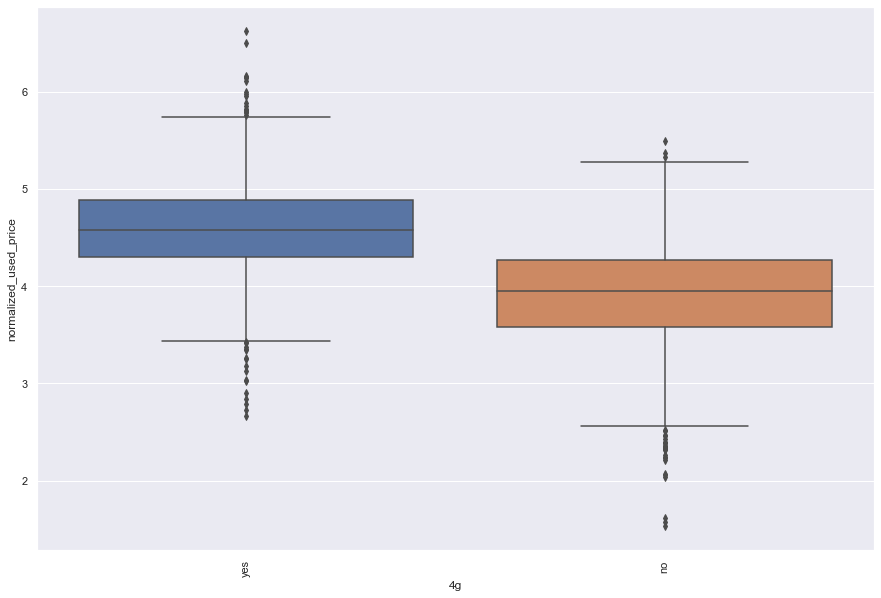

In [1238]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="4g", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

* `Used phones/tablets` with 4g network availability are expensive in general as compared to devices without 4g availability

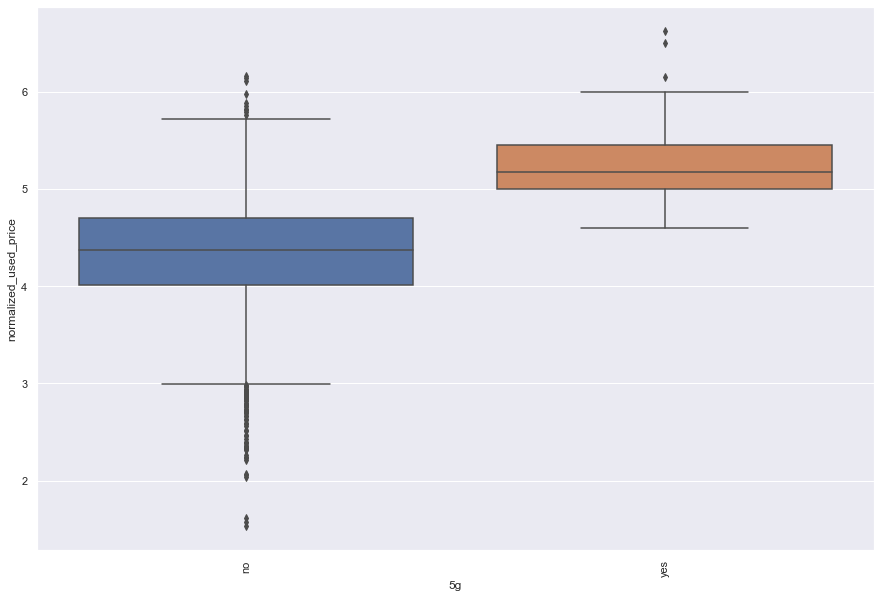

In [1239]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="5g", y="normalized_used_price")
plt.xticks(rotation=90)
plt.show()

* `New phones/tablets` with 5g network availability are expensive in general as compared to devices without 5g availability

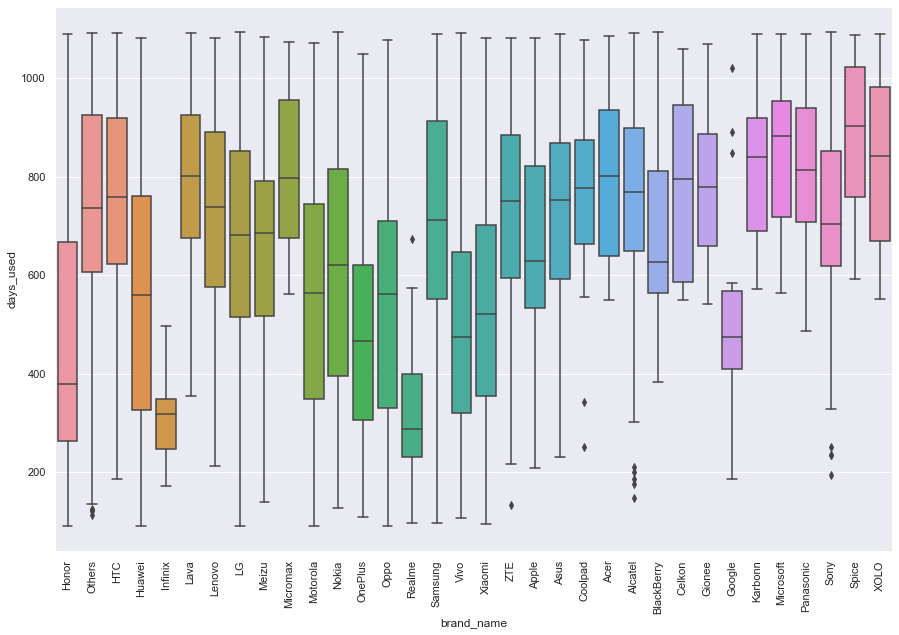

In [1240]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="days_used")
plt.xticks(rotation=90)
plt.show()

* Overall, The brand `Spice` has been used for the maximum span
* The brand `Infinix` has been used for less days

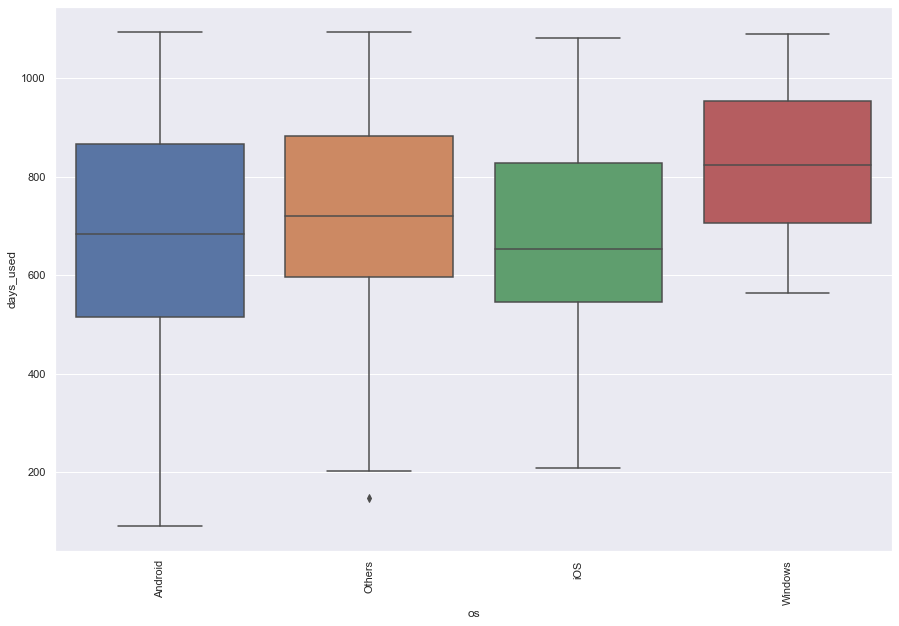

In [1241]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="os", y="days_used")
plt.xticks(rotation=90)
plt.show()

* On an average `windows`os was used for a larger timespan, while `ios` os was used the least

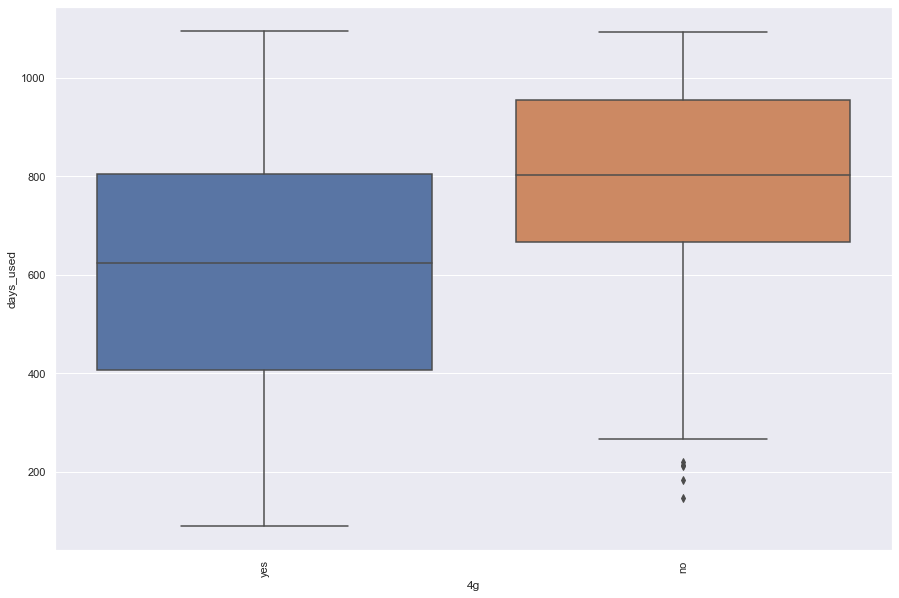

In [1242]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="4g", y="days_used")
plt.xticks(rotation=90)
plt.show()

* Phones/tablets without 4g availabilty are used for more days

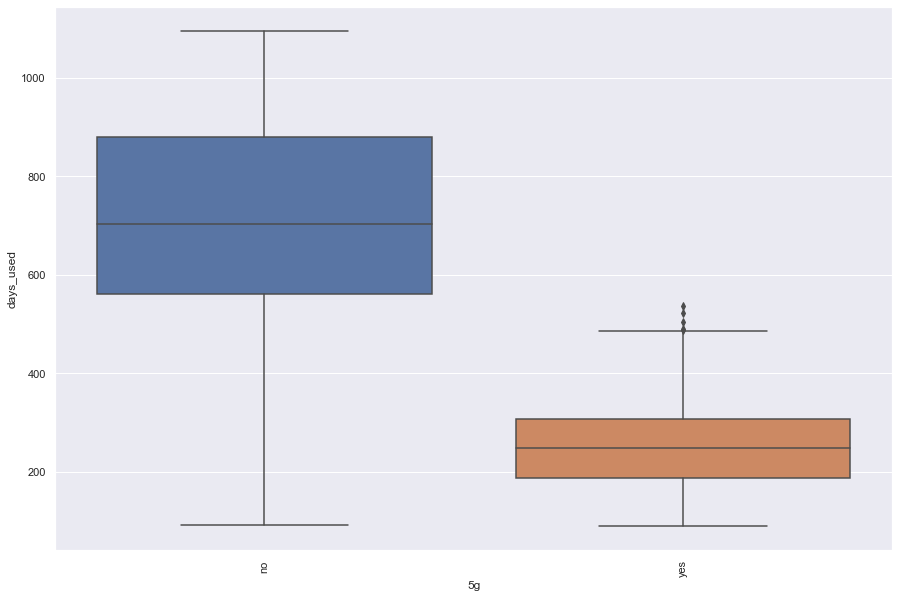

In [1243]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="5g", y="days_used")
plt.xticks(rotation=90)
plt.show()

* Phones/tablets without 5g availabilty are used for more days 

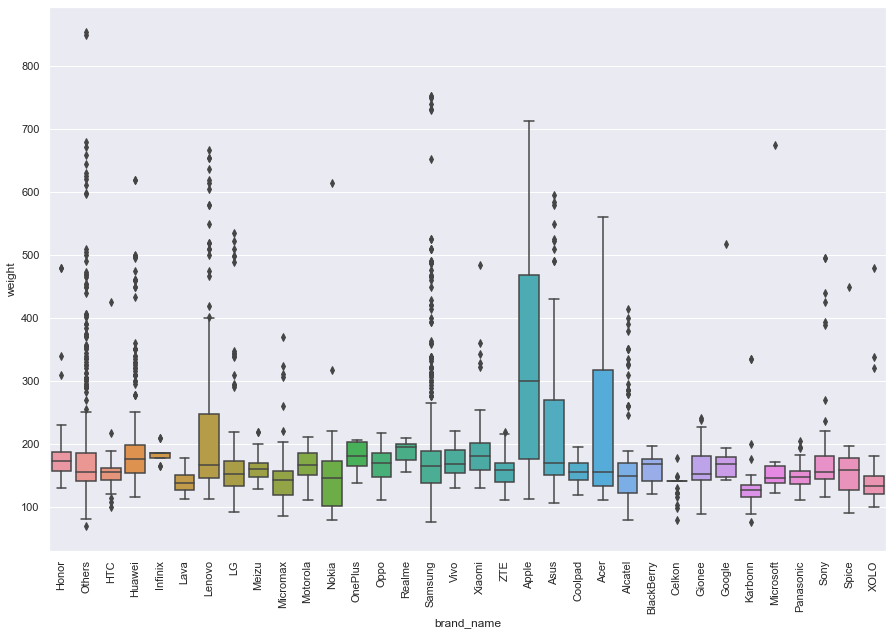

In [1244]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

* Overall weights of the `Apple` brand is more as compared to other brands
* Few of the Samsung brand phone/tablets are extremely bulky

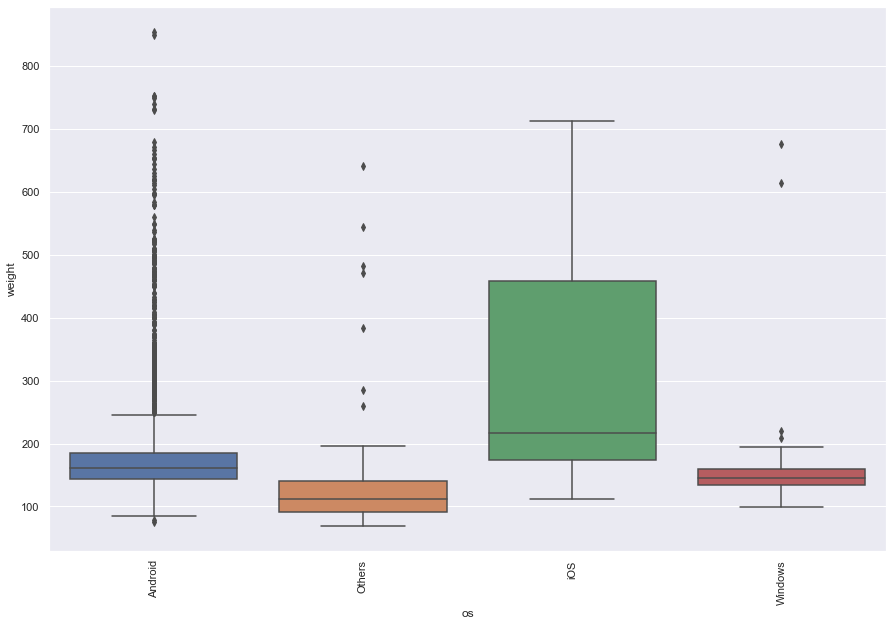

In [1245]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="os", y="weight")
plt.xticks(rotation=90)
plt.show()

* Devices using `ios` operating system are bulky 

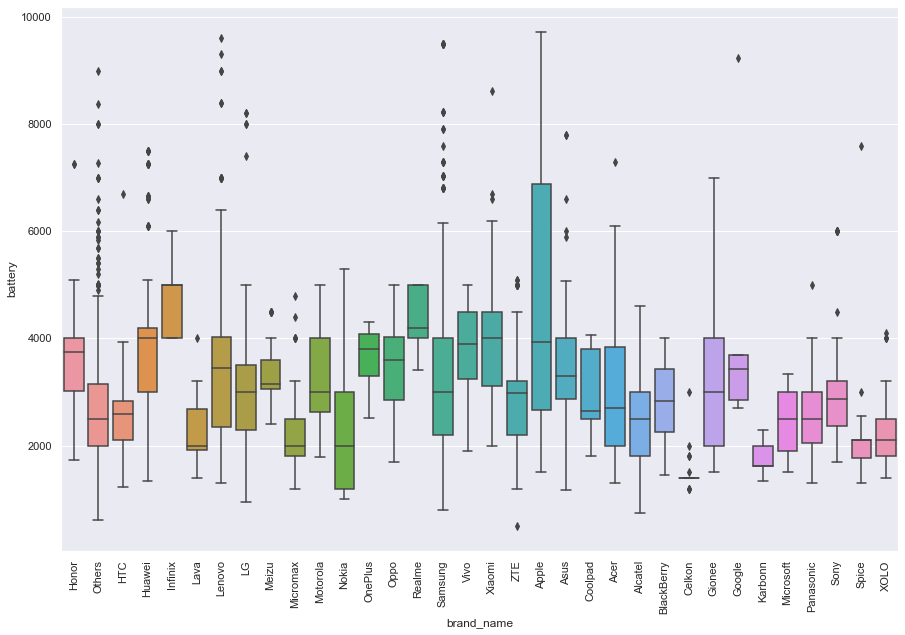

In [1246]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="battery")
plt.xticks(rotation=90)
plt.show()

* `Apple` phones need higher battery/energy capacity to operate while `karbonn` has minimum battery requirement

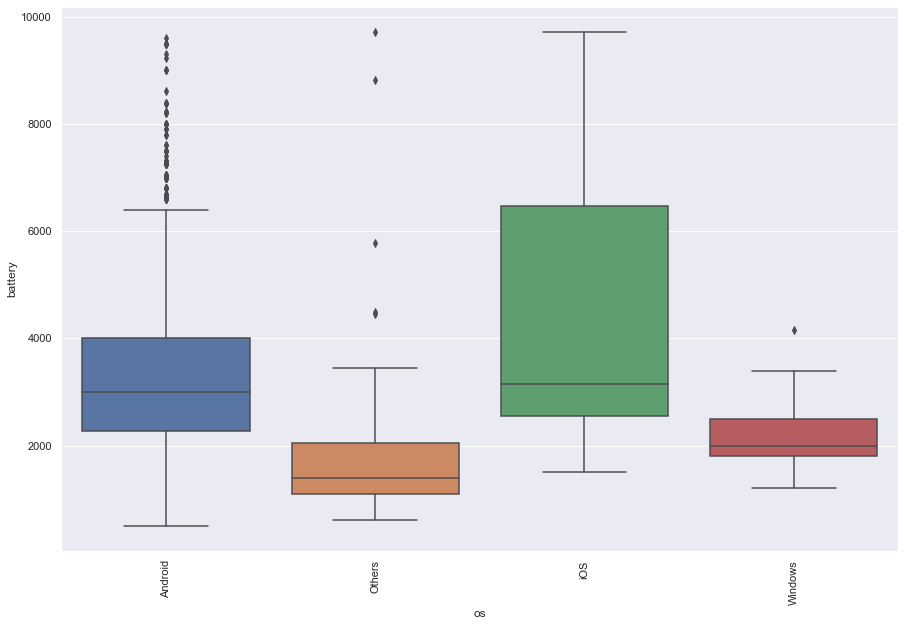

In [1247]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="os", y="battery")
plt.xticks(rotation=90)
plt.show()

* `ios` operating system consumes more battery/enrgy for efficient working

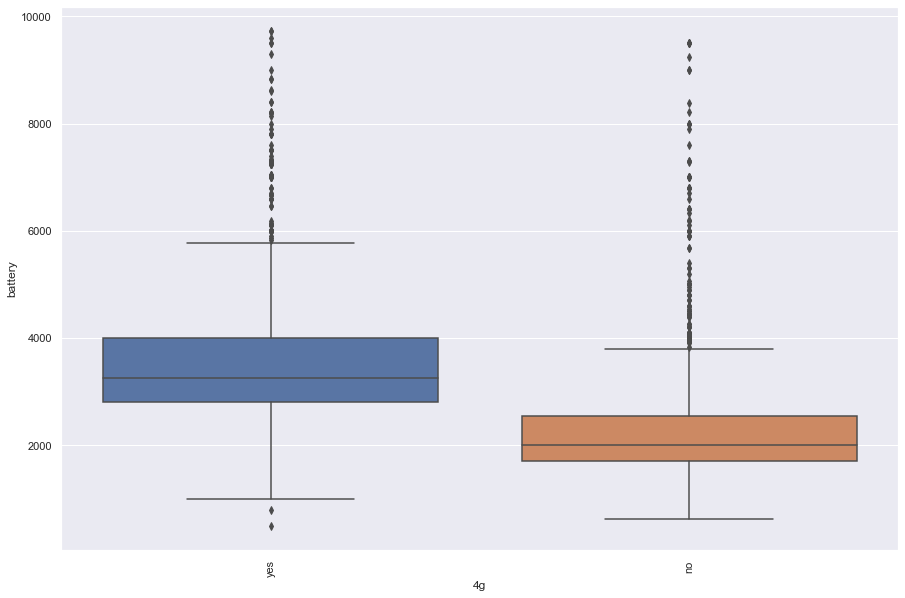

In [1248]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="4g", y="battery")
plt.xticks(rotation=90)
plt.show()

* The energy consumption of 4g available phones/tablets is more as compared to those not using 4g network

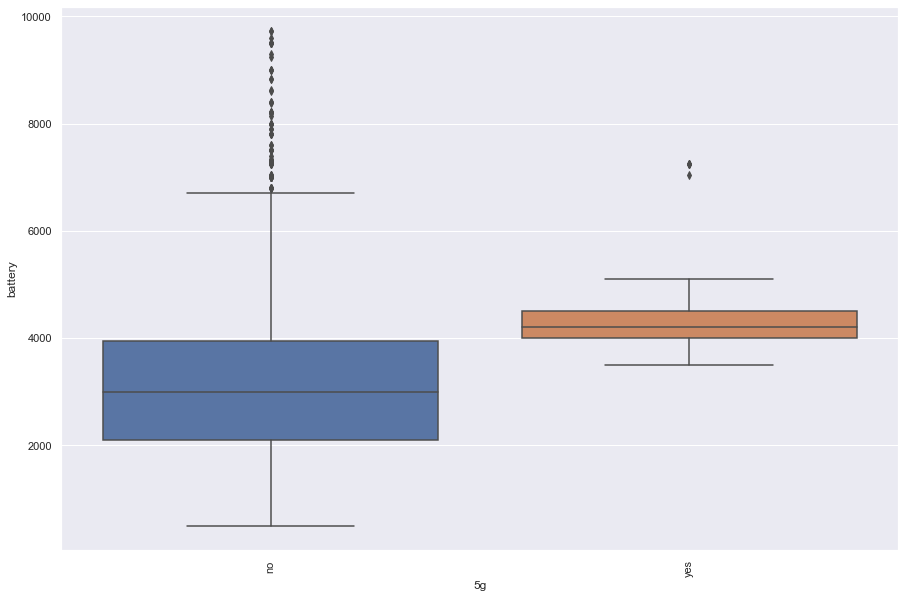

In [1249]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="5g", y="battery")
plt.xticks(rotation=90)
plt.show()

* Devices using 5g network consume more energy as compared to those without 5g network

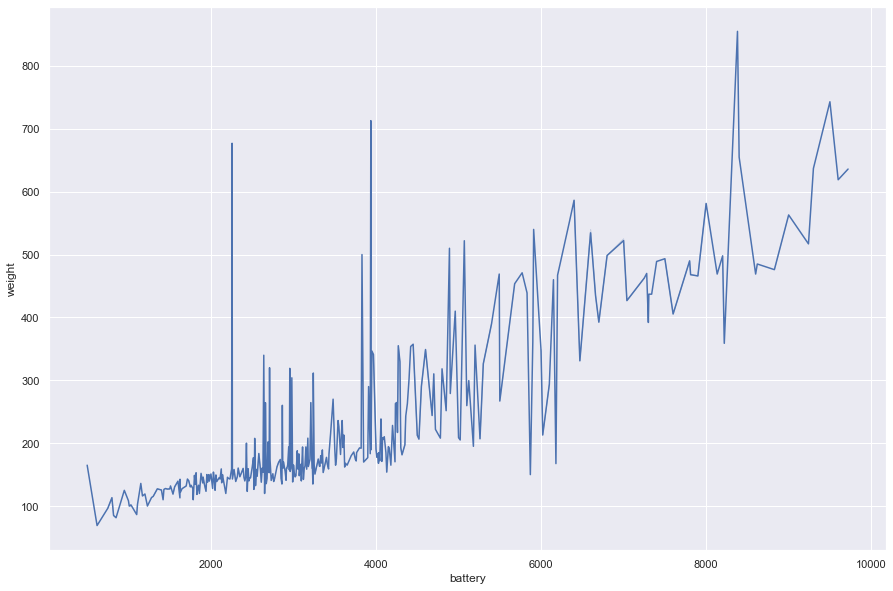

In [1250]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df1, x="battery", y="weight",ci=False)
plt.ylabel('weight')
plt.xlabel('battery')
plt.show()

* As seen from the above graph, the weight of the phone/tablet increases for phone and tablets offering larger batteries( more than 4500mAh)

In [1251]:
brandvsram = df1.groupby(['brand_name'])[['ram']].median().sort_values(by='ram', ascending=False).reset_index()
brandvsram

,brand_name,ram
0,OnePlus,6.00
1,Acer,4.00
2,Alcatel,4.00
3,Xiaomi,4.00
4,XOLO,4.00
5,Vivo,4.00
6,Spice,4.00
7,Sony,4.00
8,Samsung,4.00
9,Realme,4.00


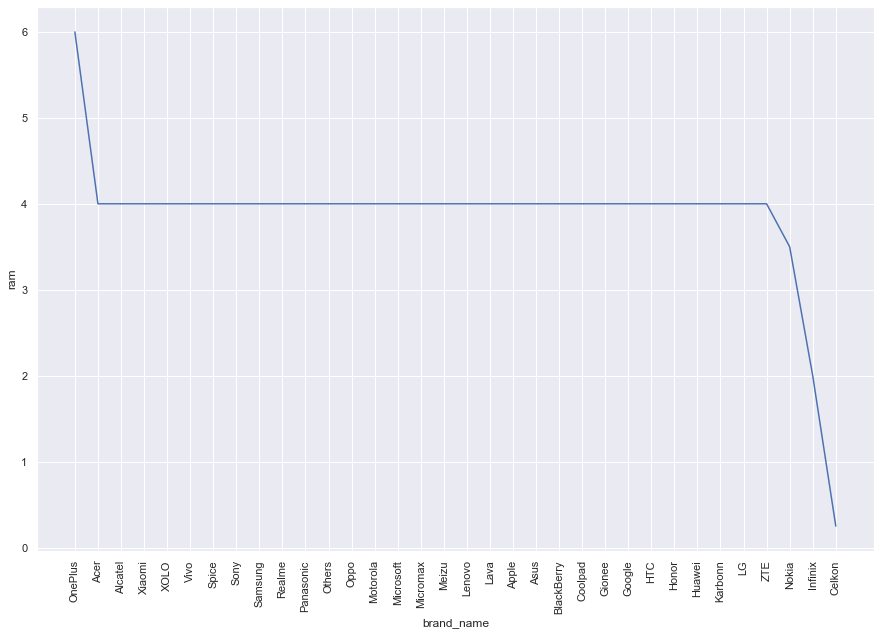

In [1252]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=brandvsram, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

* The highest available ram is 6.0GB for the `OnePlus` brand
* Most of the brands have 4.0GB ram on an average
* Brands like `Nokia`,`Infinix`, and `Celkon` have ram less than 4.0GB

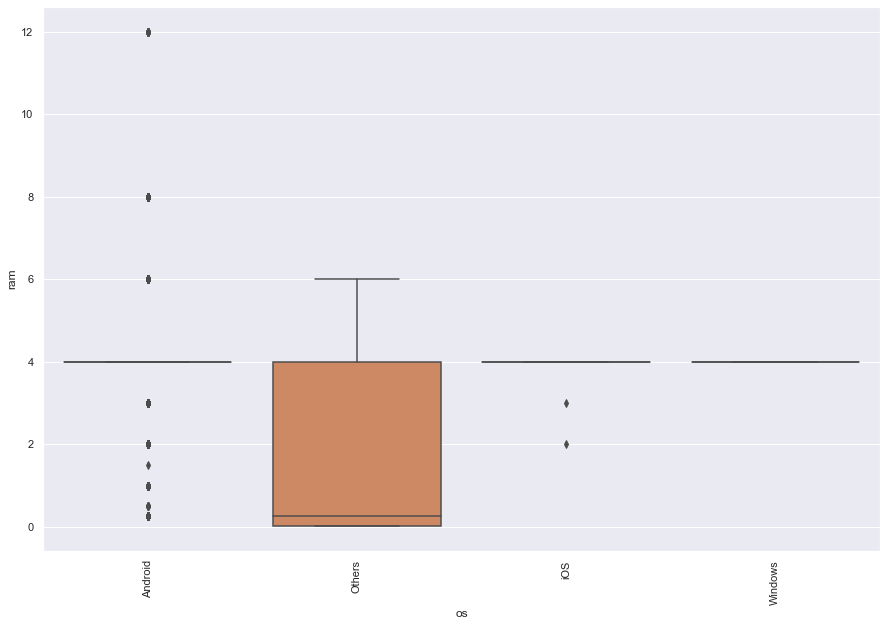

In [1253]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="os", y="ram")
plt.xticks(rotation=90)
plt.show()

* Wide range of ram has been used in  Android os while `ios` does not exceed 4gb

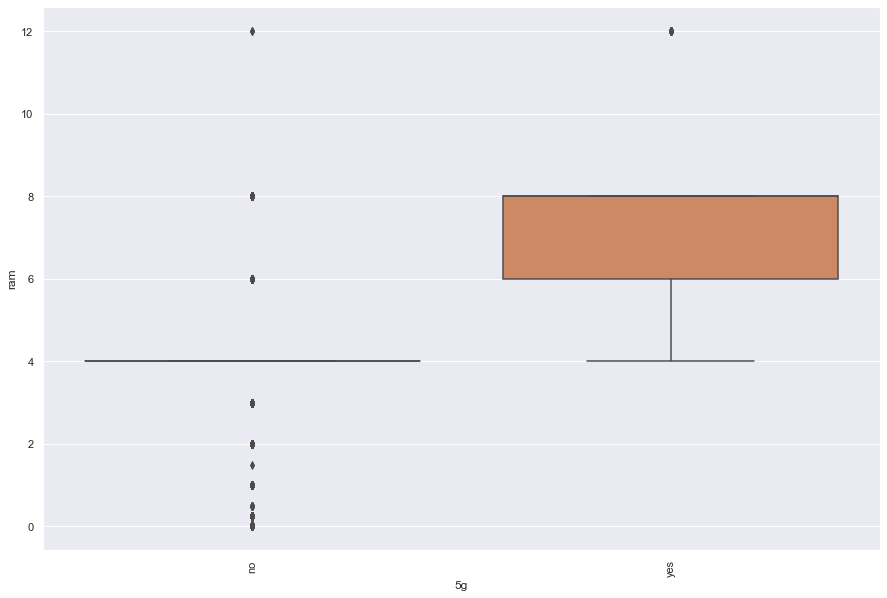

In [1254]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="5g", y="ram")
plt.xticks(rotation=90)
plt.show()

* More ram is required for devices running on 5g network 

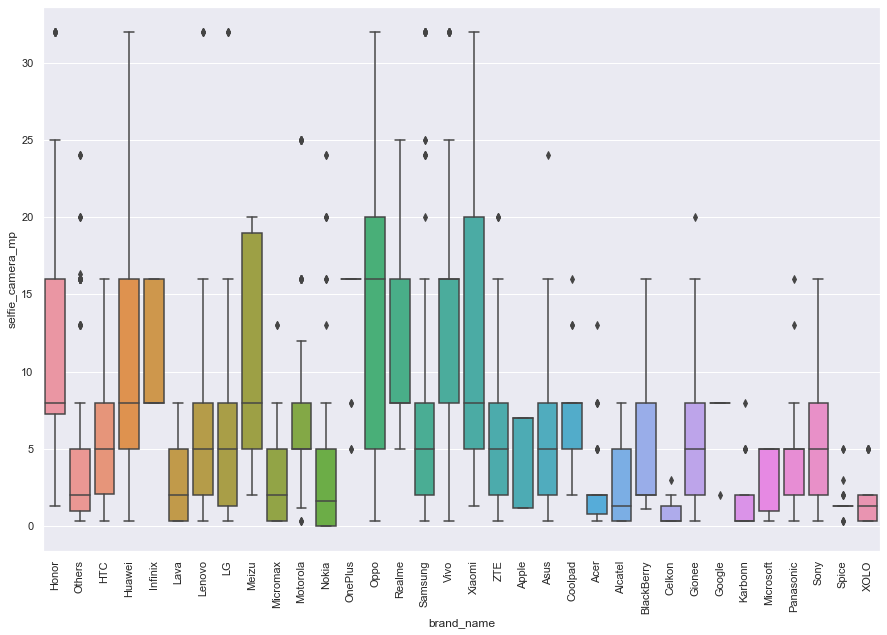

In [1255]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

* `oppo` brand provides higher pixel selfie camera 

In [1256]:
brandvsselfie = df1.loc[df1["selfie_camera_mp"]>8].reset_index()
brandvsselfie

,index,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price
0,1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018
1,8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,161,4.886054,5.299916
2,12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,537,5.383256,6.213968
3,13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,336,4.617593,5.398751
4,16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,395,5.022366,5.517935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,3438,Samsung,Android,15.34,yes,no,12.0,16.0,32.0,3.0,4000.0,169.0,369,4.760377,5.049151
651,3439,Samsung,Android,15.34,yes,no,12.0,32.0,64.0,4.0,4000.0,169.0,315,5.137092,5.443240
652,3440,Samsung,Android,15.44,yes,no,12.0,10.0,256.0,12.0,4300.0,196.0,489,5.200153,6.509499
653,3441,Samsung,Android,15.32,yes,no,12.0,10.0,256.0,8.0,3500.0,168.0,429,5.205050,6.250940


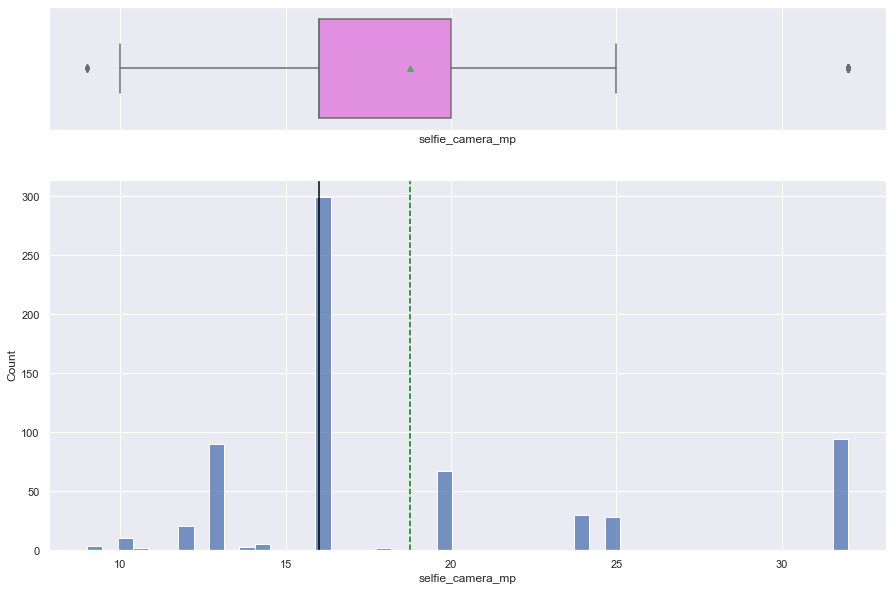

In [1257]:
histogram_boxplot(brandvsselfie, "selfie_camera_mp", bins=50)

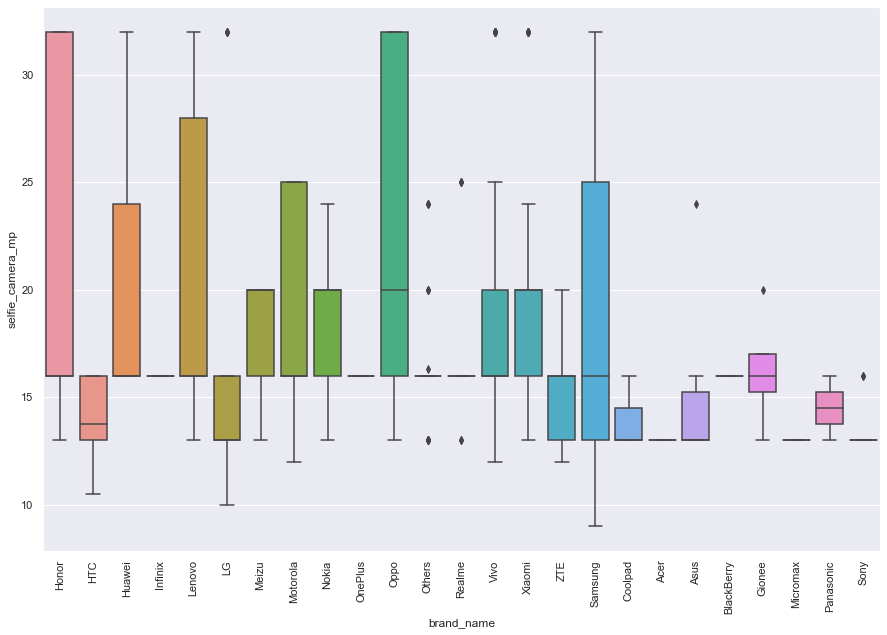

In [1258]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=brandvsselfie, x="brand_name", y="selfie_camera_mp")
plt.xticks(rotation=90)
plt.show()

* `Oppo` and `Honor` offer biggest selfie camera above 30 megapixels, followed by `Lenovo`, `Motorola` and `Samsung`

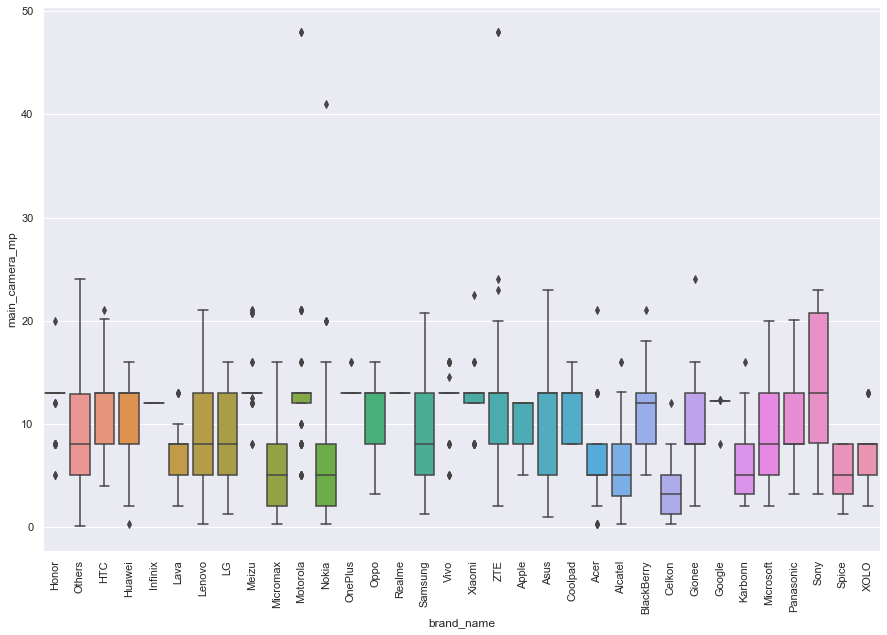

In [1259]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="main_camera_mp")
plt.xticks(rotation=90)
plt.show()

* On an average, the brand `Sony` has higher megapixel main camera

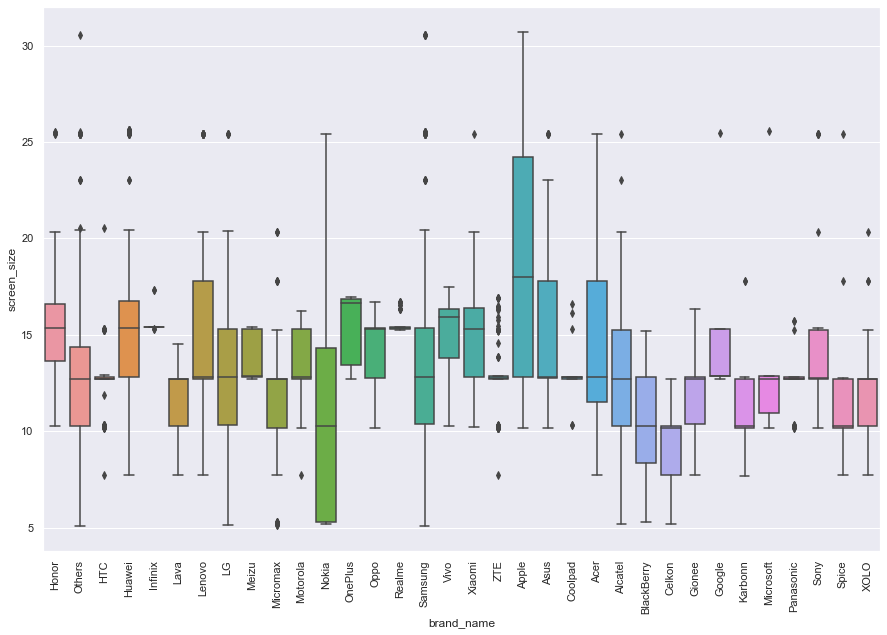

In [1260]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

* Overall, the screen size of `Apple` is biggest as compared to other brands
* Overall, the screen size of `Nokia` is smallest as compared to other brands


In [1261]:
#screensize_6 = [df1.loc[df1['screen_size']> 6,'brand_name'].value_counts()]

screensize_count = [df1.loc[df1['screen_size']> 6,'brand_name'].count()]
screensize_count

[3362]

* `3362` phones and tablets in total have a screen size greater than 6 inches

## Model Building - Linear Regression

In [1262]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     270.5
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                           00:31:42   Log-Likelihood:                 108.54
No. Observations:                   2417   AIC:                            -121.1
Df Residuals:                       2369   BIC:                             156.9
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.840**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.2556**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `normalized_new_price` is **0.4148**.

## Model Performance Check

 The performance of the model will be checked  using different metrics.

* Metric functions defined in sklearn for RMSE, MAE, and $R^2$ will be used
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [1263]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [1264]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231345,0.18151,0.842908,0.839723,4.358961


In [1265]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.24047,0.186129,0.839675,0.831885,4.542759


**Observations**

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict `normalized_used_price` within a mean error of 0.18 on the test data

- MAPE of 4.54 on the test data means that we are able to predict within 4.54% of the `normalized_used_price`

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When multicollinearity exists in the linear model, the coefficients predicted by that model  are unreliable. There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.



* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.


* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [1266]:
# Defining a function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [1267]:
round(checking_vif(x_train),2)

,feature,VIF
0,const,221.96
1,screen_size,7.41
2,main_camera_mp,2.29
3,selfie_camera_mp,2.51
4,int_memory,1.35
5,ram,2.29
6,battery,3.97
7,weight,6.17
8,days_used,1.91
9,normalized_new_price,2.92


* There are multiple columns with high VIF values, indicating presence of multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity we will be following the below steps

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till we get all VIF scores under 5.

Let's define a function that will help us do this.

In [1268]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [1269]:
col_list = ["screen_size","weight"]
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.836945,0.235743
1,screen_size,0.835262,0.236957


In [1270]:
col_to_drop = "weight"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = round(checking_vif(x_train2),2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,206.37
1,screen_size,3.58
2,main_camera_mp,2.17
3,selfie_camera_mp,2.44
4,int_memory,1.35
5,ram,2.29
6,battery,3.63
7,days_used,1.83
8,normalized_new_price,2.90
9,brand_name_Alcatel,3.41


* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [1271]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.840
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     270.6
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                           00:31:43   Log-Likelihood:                 86.749
No. Observations:                   2417   AIC:                            -79.50
Df Residuals:                       2370   BIC:                             192.6
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

- We can see that adj. R-squared has dropped from 0.840 to 0.837, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [1272]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'normalized_new_price', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [1273]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [1274]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1384.
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                           00:31:43   Log-Likelihood:                 71.487
No. Observations:                   2417   AIC:                            -123.0
Df Residuals:                       2407   BIC:                            -65.07
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [1275]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234919,0.184036,0.838017,0.837344,4.413287


In [1276]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240114,0.18621,0.840149,0.838591,4.531522


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.837, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.837
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Need for linearity test**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.


In [1277]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.851481,0.236007
1525,4.448399,4.624006,-0.175606
1128,4.315353,4.269750,0.045602
3003,4.282068,4.265566,0.016502
2907,4.456438,4.457975,-0.001537


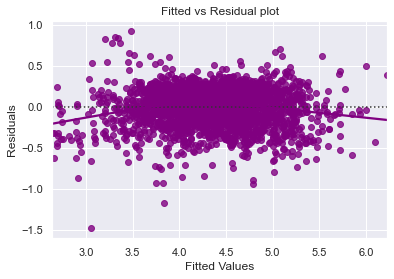

In [1278]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. 

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

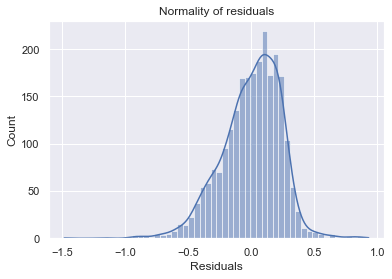

In [1279]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram of residuals does have a bell shape.
*  Let's check the Q-Q plot.

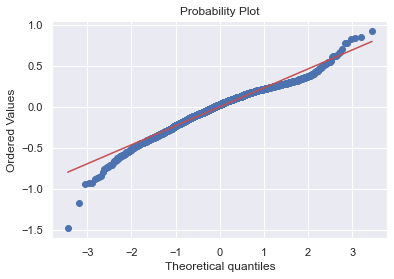

In [1280]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [1281]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9731818437576294, pvalue=6.92661577126942e-21)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [1282]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0595724516399172), ('p-value', 0.1583249174858483)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Since all the assumptions of linear regression have been checked and are satisfied, we will proceed with prediction.

In [1283]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.368967
2341,3.696103,3.936704
1913,3.592093,3.781089
688,4.306495,4.141465
650,4.522115,5.091362
2291,4.259294,4.405444
40,4.997685,5.400932
1884,3.875359,4.075093
2538,4.206631,4.035175
45,5.380450,5.279466


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [1284]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [1285]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1384.
Date:                   Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                           00:31:44   Log-Likelihood:                 71.487
No. Observations:                   2417   AIC:                            -123.0
Df Residuals:                       2407   BIC:                            -65.07
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [1286]:
olsmodel_final.params

const                   1.159352
screen_size             0.045029
main_camera_mp          0.019361
selfie_camera_mp        0.015035
ram                     0.018095
normalized_new_price    0.416371
brand_name_Lenovo       0.046447
brand_name_Nokia        0.091182
brand_name_Xiaomi       0.088083
4g_yes                  0.065403
dtype: float64

In [1287]:
# Let us write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train_final.columns[i], ")")

normalized_used_price = 1.1593518683991095 + 0.04502882901538301 * ( screen_size ) +  0.019361297697227636 * ( main_camera_mp ) +  0.015035181487858821 * ( selfie_camera_mp ) +  0.018095202551672462 * ( ram ) +  0.4163710347147059 * ( normalized_new_price ) +  0.04644730525347883 * ( brand_name_Lenovo ) +  0.0911816971097153 * ( brand_name_Nokia ) +  0.08808277821968621 * ( brand_name_Xiaomi ) +  0.0654029435940962 * ( 4g_yes )


In [1288]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234919,0.184036,0.838017,0.837344,4.413287


In [1289]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240114,0.18621,0.840149,0.838591,4.531522


* The model is able to explain ~84% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 4.53% of the normalized used price

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

## Actionable Insights and Recommendations 

* The model is able to explain ~84% of the variation in the data and within 4.53% of the normalized used price on the test data, which is good
    - This indicates that the model is good for prediction as well as inference purposes


* If the normalized new price  increases by one unit, then normalized used price increases by 0.4163 units, all other variables held constant


* If the device belongs to brand_name Nokia increases by one unit, then its normalized used price increases by 0.0911 units, all other variables held constant


* If the devices belongs to brand_name_Xiaomi increases by one unit, then its normalized used price increases by 0.0880  units, all other variables held constant


* If the devices belongs to brand_name_Lenovo increases by one unit, then its normalized used price increases by 0.0464  units, all other variables held constant


* As the normalized used price increase with an increase in the megapixels for the main and selfie camera, the company can sell devices with higher camera resolution/megapixels


* As the normalized used price increase with an increase in the RAM of the device, the company can sell devices with higher RAM


* As the normalized used price increase with an increase in the screen size of the device, the company can sell devices with bigger screen size


* As the normalized used price increase with an increase in 4g availability , the company can look to sell more 4g supported products


* Recell can look to increase the number of sales of devices belonging to the Nokia and Xiaomi brands


* ReCell can gather data about their customers like age, gender, geographical location, occupation, etc. to better understand the kind of mobile phones and tablets different customers like

___